# Data Science Field Analysis

As an individual I am really interested in Data Science. So I decided to do a study about the jobs related to the field of Data Science. My goal is to predict salaries of positions based on features related to the job.  

### Data Collection
- **Scraping Data Science Jobs in Glassdoor**

I tried to find the data for this project in Glassdoor website. In order to scrape data from Glassdoor I used scraping with Beautiful Soup. 

In [1]:
import csv
from datetime import datetime
import requests
from bs4 import BeautifulSoup

In [2]:
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.182 Safari/537.36'}
url = 'https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600'

#Extract a raw html
response = requests.get(url, headers = headers)
response

<Response [200]>

We got an 200, so everything is fine.

In [3]:
#Instantiate a soup object
soup = BeautifulSoup(response.text, 'lxml')

In [4]:
#Get all the job tabs
cards = soup.find_all('li', class_='react-job-listing')
cards
len(cards)

30

 - Prototype the model with a single record

[<li class="react-job-listing css-wp148e eigr9kq3" data-ad-order-id="1044074" data-adv-type="EMPLOYER" data-brandviews="BRAND:n=jsearch-job-listing:eid=13880:jlid=3817950211" data-id="3817950211" data-is-easy-apply="false" data-is-organic-job="false" data-job-loc="Arlington, VA" data-job-loc-id="1130337" data-job-loc-type="C" data-normalize-job-title="Data Scientist" data-selected="false" data-sgoc-id="1019" data-test="jobListing" style="border-bottom:0"><style data-emotion-css="x75kgh">.css-x75kgh .e1cjmv6j1{-webkit-align-items:center;-webkit-box-align:center;-ms-flex-align:center;align-items:center;border:0;font-size:12px;font-weight:700;padding:0 4px;}</style><div class="d-flex flex-column css-x75kgh e1rrn5ka3"><a class="jobLink" href="/partner/jobListing.htm?pos=101&amp;ao=1044074&amp;s=149&amp;guid=00000177b4d079c5bd84028bb21f1006&amp;src=GD_JOB_AD&amp;t=SRFJ&amp;vt=w&amp;cs=1_2069a206&amp;cb=1613646298260&amp;jobListingId=3817950211" rel="nofollow noopener noreferrer" target="_bl
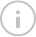

In [7]:
card = cards[0]
cards

In [6]:
#Find job name
job = card.find('a', {'data-test':'job-link'}).span.text.strip()
job


'Data Scientist'

In [7]:
#Find company name
company = card.find('a', class_='css-l2wjgv').span.text.strip()
company

'ManTech International Corporation'

In [8]:
#Find the location
location = card.find('div', class_='d-flex flex-wrap css-11d3uq0 e1rrn5ka2').span.text.strip()
location

'Arlington, VA'

In [9]:
#Find Salary
salary = card.find('div', class_='d-flex flex-wrap css-1i7b5bu e1rrn5ka1').div.span.text
salary = salary.replace('$','').replace('K','').replace('-','').split()
avg_salary = (int(salary[0]) + int(salary[1]))/2
avg_salary

93.0

In [8]:
#Get the link of the specific job
link_job = 'https://www.glassdoor.com' + card.find('div', class_='d-flex justify-content-between align-items-start').a.get('href')
link_job

'https://www.glassdoor.com/partner/jobListing.htm?pos=101&ao=1044074&s=149&guid=00000177b4d079c5bd84028bb21f1006&src=GD_JOB_AD&t=SRFJ&vt=w&cs=1_2069a206&cb=1613646298260&jobListingId=3817950211'

In [9]:
#Go to the job page
page = requests.get(link_job, headers=headers)
print(page)
soup_page = BeautifulSoup(page.text, 'lxml')
soup_page

<Response [200]>


<!DOCTYPE html>
<html class="flex" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraph.org/schema/">
<head><title>ManTech International Corporation Data Scientist Job in Arlington, VA | Glassdoor</title><link href="https://fonts.google.com" rel="preconnect"/><link href="https://fonts.google.com" rel="dns-prefetch"/><link href="https://www.googletagmanager.com" rel="preconnect"/><link href="https://www.googletagmanager.com" rel="dns-prefetch"/><link href="https://www.google-analytics.com" rel="preconnect"/><link href="https://www.google-analytics.com" rel="dns-prefetch"/><link href="https://www.google.com" rel="preconnect"/><link href="https://www.google.com" rel="dns-prefetch"/><link href="https://apis.google.com" rel="preconnect"/><link href="https://apis.google.com" rel="dns-prefetch"/><link href="https://www.googleadservices.com" rel="preconnect"/><link href="https://www.googleadservices.com" rel="dns-prefetch"/><link href="https://adservice.google.com"

In [10]:
#Tab
tab = soup_page.find_all('div', {'class':'css-1hb8zec e1juszzg2'})[1]
tab

<div class="css-1hb8zec e1juszzg2"><div><div class="css-1ieo3ql e1juszzg7"><span class="css-1vg6q84 e1juszzg6">Job Type :<!-- --> </span><style data-emotion-css="sr4ps0">.css-sr4ps0{-webkit-flex:1px 1 1;-ms-flex:1px 1 1;flex:1px 1 1;-webkit-flex-shrink:1;-ms-flex-negative:1;flex-shrink:1;overflow:hidden;text-overflow:ellipsis;}</style><span class="css-sr4ps0 e1juszzg4">Full-time</span></div><div class="css-1ieo3ql e1juszzg7"><span class="css-1vg6q84 e1juszzg6">Job Function :<!-- --> </span><style data-emotion-css="o4d739">.css-o4d739{-webkit-flex:1px 1 1;-ms-flex:1px 1 1;flex:1px 1 1;text-transform:capitalize;-webkit-flex-shrink:1;-ms-flex-negative:1;flex-shrink:1;overflow:hidden;text-overflow:ellipsis;}</style><span class="css-o4d739 e1juszzg4">data scientist</span></div></div><div><div class="css-1ieo3ql e1juszzg7"><span class="css-1vg6q84 e1juszzg6">Industry :<!-- --> </span><span class="css-sr4ps0 e1juszzg4">Business Services</span></div><div class="css-1ieo3ql e1juszzg7"><span cla

In [13]:
#Job Description
description = soup_page.find('div', class_='desc css-58vpdc ecgq1xb4').text.strip()
description

"Secure our Nation, Ignite your FutureManTech is seeking a Data Scientist to join our growing team supporting our USMC intel contract in Arlington, VA (Pentagon).This position requires an active DOD Secret clearance (In JPAS)The successful candidate will a nalyze complex local and wide area network systems, including planning, designing, evaluating, selecting operating systems and protocol suites and configuring communication media with concentrators, bridges, and other devices. Resolves difficult inter-operability problems to obtain operation across all platforms, including e-mail, files transfer, multimedia, teleconferencing and the like. Configures systems to user environments. Serves as industry-recognized expert. Education and Experience: Bachelor's Degree or equivalent. 12 to 15 years of relevant work experience. Physical Requirements: Sedentary WorkGeneral Responsibilities:Establish comprehensive plan for collecting, processing, exploiting and managing publicly available informa

In [58]:
#Job type
job_type = tab.find_all('div', {'class':'css-1ieo3ql e1juszzg7'})[0].find('span', {'class':'css-sr4ps0 e1juszzg4'}).text.strip()
job_type

'Full-time'

In [59]:
#Job function
job_fun = tab.find_all('div', {'class':'css-1ieo3ql e1juszzg7'})[1].find('span', {'class':'css-o4d739 e1juszzg4'}).text.strip()
job_fun

'data scientist'

In [62]:
#Industry
ind = tab.find_all('div', {'class':'css-1ieo3ql e1juszzg7'})[2].find('span', {'class':'css-sr4ps0 e1juszzg4'}).text.strip()
ind

'Business Services'

In [69]:
#Number of employees
n_emp = tab.find_all('div', {'class':'css-1ieo3ql e1juszzg7'})[3].find('span', {'class':'css-sr4ps0 e1juszzg4'}).text.strip()
nemp = n_emp.replace('Employees','')
nemp

'5001 to 10000 '

Generalize the model with a function

In [4]:
def get_job_specs(card):
    #Job name
    try:
        job = card.find('a', {'data-test':'job-link'}).span.text.strip()
    except AttributeError:
        job = ''
    #Company name
    try:
        company = card.find('a', class_='css-l2wjgv').span.text.strip()
    except AttributeError:
        company = ''
    #Location
    try:
        location = card.find('div', class_='d-flex flex-wrap css-11d3uq0 e1rrn5ka2').span.text.strip()
    except AttributeError:
        location = ''
    #Average Salary
    try:
        salary = card.find('div', class_='d-flex flex-wrap css-1i7b5bu e1rrn5ka1').div.span.text   
    except AttributeError:
        salary = ''
    
    #Get the link of the specific job
    link_job = 'https://www.glassdoor.com' + card.find('div', class_='d-flex justify-content-between align-items-start').a.get('href')
    #Job Page
    page = requests.get(link_job, headers=headers)
    soup_page = BeautifulSoup(page.text, 'lxml')
    #Job Description
    try:
        #Job Description
        description = soup_page.find('div', class_='desc css-58vpdc ecgq1xb4').text.strip()
    except:
        description = ''
    #Tab
    try:
        tab = soup_page.find_all('div', {'class':'css-1hb8zec e1juszzg2'})[1]
        #Job type
        try:
            job_type = tab.find_all('div', {'class':'css-1ieo3ql e1juszzg7'})[0].find('span', {'class':'css-sr4ps0 e1juszzg4'}).text.strip()
        except:
            job_type = ''
        #Job function
        try:
            job_fun = tab.find_all('div', {'class':'css-1ieo3ql e1juszzg7'})[1].find('span', {'class':'css-o4d739 e1juszzg4'}).text.strip()    
        except:
            job_fun = ''
        #Industry
        try:
            ind = tab.find_all('div', {'class':'css-1ieo3ql e1juszzg7'})[2].find('span', {'class':'css-sr4ps0 e1juszzg4'}).text.strip()
        except:
            ind = ''
        #Number of employees
        try:
            n_emp = tab.find_all('div', {'class':'css-1ieo3ql e1juszzg7'})[3].find('span', {'class':'css-sr4ps0 e1juszzg4'}).text.strip()
        except:
            n_emp = ''
    except:
        job_type = ''
        job_fun = ''
        ind = ''
        n_emp = ''
        description = ''
        
    job_specs = (job, company, location, salary, description, job_type, job_fun, ind, n_emp)
    
    return job_specs

In [15]:
get_job_specs(card)

('Data Scientist',
 'ManTech International Corporation',
 'Arlington, VA',
 93.0,
 "Secure our Nation, Ignite your FutureManTech is seeking a Data Scientist to join our growing team supporting our USMC intel contract in Arlington, VA (Pentagon).This position requires an active DOD Secret clearance (In JPAS)The successful candidate will a nalyze complex local and wide area network systems, including planning, designing, evaluating, selecting operating systems and protocol suites and configuring communication media with concentrators, bridges, and other devices. Resolves difficult inter-operability problems to obtain operation across all platforms, including e-mail, files transfer, multimedia, teleconferencing and the like. Configures systems to user environments. Serves as industry-recognized expert. Education and Experience: Bachelor's Degree or equivalent. 12 to 15 years of relevant work experience. Physical Requirements: Sedentary WorkGeneral Responsibilities:Establish comprehensive 

In [73]:
jobs_specs = []

for card in cards:
    job_specs = get_job_specs(card)
    jobs_specs.append(job_specs)

In [74]:
jobs_specs

[('Data Scientist',
  'ManTech International Corporation',
  'Arlington, VA',
  93.0,
  'Full-time',
  'data scientist',
  'Business Services',
  '5001 to 10000 Employees'),
 ('AI Data Scientist',
  'Stanley Black & Decker',
  'Fishers, IN',
  102.0,
  'Full-time',
  'data scientist',
  'Manufacturing',
  '10000+ Employees'),
 ('Scientist - Antibody Drug Conjugates',
  'AstraZeneca',
  'Gaithersburg, MD',
  92.0,
  'Full-time',
  'research scientist',
  'Biotech & Pharmaceuticals',
  '10000+ Employees'),
 ('Senior Bioinfo Scientist',
  'Inova Health System',
  'Falls Church, VA',
  102.0,
  'Full-time',
  'research scientist',
  'Health Care',
  '10000+ Employees'),
 ('R&D Associate II / Associate Scientist I - Early Stage Formulation Sciences',
  'AstraZeneca',
  'Gaithersburg, MD',
  95.0,
  'Full-time',
  'research scientist',
  'Biotech & Pharmaceuticals',
  '10000+ Employees'),
 ('Scientist',
  'ACON Laboratories',
  'San Diego, CA',
  84.0,
  'Full-time',
  'research scientist',


In [75]:
len(jobs_specs)

30

Getting the next page

In [89]:
#Inspect the arrow to move to the next page
#We use {} to find a propertie name inside the identifier
#We get the url of the next page
next_ = soup.find('a', {'data-test':'pagination-next'}).get('href')
next_

'/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600&p=2'

In [90]:
#Next page url
url_next = 'https://www.glassdoor.com' + next_
url_next

'https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600&p=2'

#### Now let's generalize the scraping

In [5]:
jobs_specs=[]
page = 1
next_page = 1
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.182 Safari/537.36'}
url = 'https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600'

#Extract a raw html
response = requests.get(url, headers = headers)
print(response)

#Instantiate a soup object
soup = BeautifulSoup(response.text, 'lxml')

while True:
    job_number = 1
    print('Page {} \n'.format(page))    
    #Get all the job tabs
    cards = soup.find_all('li', class_='react-job-listing')
    print('Page with {} jobs \n<..........>\n'.format(len(cards)))
    for card in cards:
        print('Page {}, Job {}'.format(page, job_number))
        job_specs = get_job_specs(card)
        jobs_specs.append(job_specs)
        job_number = job_number + 1
    
    next_page = next_page + 1
    next_page_string = str(next_page)
    str_ = '_IP' + next_page_string
    
    try: 
        #url = 'https://www.glassdoor.com' + soup.find('a', {'data-test':'pagination-next'}).get('href')
        url = 'https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17{}.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600'.format(str_)
    except AttributeError:
        break
    
    
    print('\n\n')
    print('New url: ', url)
    print('\n\n')
    
    page = page + 1
    
    #Extract a raw html
    response = requests.get(url, headers=headers)
    print(response)
       
    #Instantiate a soup object
    soup = BeautifulSoup(response.text, 'lxml')
        

<Response [200]>
Page 1 

Page with 30 jobs 
<..........>

Page 1, Job 1
Page 1, Job 2
Page 1, Job 3
Page 1, Job 4
Page 1, Job 5
Page 1, Job 6
Page 1, Job 7
Page 1, Job 8
Page 1, Job 9
Page 1, Job 10
Page 1, Job 11
Page 1, Job 12
Page 1, Job 13
Page 1, Job 14
Page 1, Job 15
Page 1, Job 16
Page 1, Job 17
Page 1, Job 18
Page 1, Job 19
Page 1, Job 20
Page 1, Job 21
Page 1, Job 22
Page 1, Job 23
Page 1, Job 24
Page 1, Job 25
Page 1, Job 26
Page 1, Job 27
Page 1, Job 28
Page 1, Job 29
Page 1, Job 30



New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP2.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [200]>
Page 2 

Page with 32 jobs 
<..........>

Page 2, Job 1
Page 2, Job 2
Page 2, Job 3
Page 2, Job 4
Page 2, Job 5
Page 2, Job 6
Page 2, Job 7
Page 2, Job 8
Page 2, Job 9
Page 2, Job 10
Page 2, Job 11
Page 2, Job 12
Page 2, Job 13
Page 2, Job 14
Page 2, Job 15
Page 2, Job 16
Page 2, Job 17
Page 2, Job 18
Page 2, Job 19
Page 2

Page 13, Job 2
Page 13, Job 3
Page 13, Job 4
Page 13, Job 5
Page 13, Job 6
Page 13, Job 7
Page 13, Job 8
Page 13, Job 9
Page 13, Job 10
Page 13, Job 11
Page 13, Job 12
Page 13, Job 13
Page 13, Job 14
Page 13, Job 15
Page 13, Job 16
Page 13, Job 17
Page 13, Job 18
Page 13, Job 19
Page 13, Job 20
Page 13, Job 21
Page 13, Job 22
Page 13, Job 23
Page 13, Job 24
Page 13, Job 25
Page 13, Job 26
Page 13, Job 27
Page 13, Job 28
Page 13, Job 29
Page 13, Job 30



New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP14.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [200]>
Page 14 

Page with 30 jobs 
<..........>

Page 14, Job 1
Page 14, Job 2
Page 14, Job 3
Page 14, Job 4
Page 14, Job 5
Page 14, Job 6
Page 14, Job 7
Page 14, Job 8
Page 14, Job 9
Page 14, Job 10
Page 14, Job 11
Page 14, Job 12
Page 14, Job 13
Page 14, Job 14
Page 14, Job 15
Page 14, Job 16
Page 14, Job 17
Page 14, Job 18
Page 14, Job 19
Page 14, Job 20
Page 14, Job 

<Response [200]>
Page 25 

Page with 30 jobs 
<..........>

Page 25, Job 1
Page 25, Job 2
Page 25, Job 3
Page 25, Job 4
Page 25, Job 5
Page 25, Job 6
Page 25, Job 7
Page 25, Job 8
Page 25, Job 9
Page 25, Job 10
Page 25, Job 11
Page 25, Job 12
Page 25, Job 13
Page 25, Job 14
Page 25, Job 15
Page 25, Job 16
Page 25, Job 17
Page 25, Job 18
Page 25, Job 19
Page 25, Job 20
Page 25, Job 21
Page 25, Job 22
Page 25, Job 23
Page 25, Job 24
Page 25, Job 25
Page 25, Job 26
Page 25, Job 27
Page 25, Job 28
Page 25, Job 29
Page 25, Job 30



New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP26.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [200]>
Page 26 

Page with 30 jobs 
<..........>

Page 26, Job 1
Page 26, Job 2
Page 26, Job 3
Page 26, Job 4
Page 26, Job 5
Page 26, Job 6
Page 26, Job 7
Page 26, Job 8
Page 26, Job 9
Page 26, Job 10
Page 26, Job 11
Page 26, Job 12
Page 26, Job 13
Page 26, Job 14
Page 26, Job 15
Page 26, Job 16
Pa

<Response [404]>
Page 50 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP51.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 51 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP52.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 52 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP53.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 53 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP54.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 54 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs

<Response [404]>
Page 88 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP89.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 89 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP90.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 90 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP91.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 91 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP92.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 92 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs

<Response [404]>
Page 126 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP127.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 127 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP128.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 128 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP129.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 129 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP130.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 130 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scien

<Response [404]>
Page 164 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP165.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 165 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP166.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 166 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP167.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 167 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP168.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 168 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scien

<Response [404]>
Page 202 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP203.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 203 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP204.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 204 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP205.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 205 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP206.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 206 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scien

<Response [404]>
Page 240 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP241.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 241 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP242.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 242 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP243.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 243 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP244.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 244 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scien

<Response [404]>
Page 278 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP279.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 279 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP280.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 280 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP281.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 281 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP282.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 282 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scien

<Response [404]>
Page 316 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP317.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 317 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP318.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 318 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP319.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [403]>
Page 319 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP320.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 320 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scien

<Response [404]>
Page 354 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP355.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 355 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP356.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 356 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP357.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 357 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP358.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [403]>
Page 358 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scien

<Response [404]>
Page 392 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP393.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 393 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP394.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [403]>
Page 394 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP395.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 395 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP396.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 396 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scien

<Response [404]>
Page 430 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP431.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [403]>
Page 431 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP432.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 432 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP433.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 433 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP434.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 434 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scien

Page 467 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP468.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 468 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP469.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [403]>
Page 469 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP470.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 470 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP471.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 471 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL

<Response [403]>
Page 505 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP506.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [403]>
Page 506 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP507.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 507 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP508.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [403]>
Page 508 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP509.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [403]>
Page 509 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scien

<Response [403]>
Page 543 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP544.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 544 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP545.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [403]>
Page 545 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP546.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [403]>
Page 546 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP547.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [403]>
Page 547 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scien

<Response [404]>
Page 581 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP582.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [403]>
Page 582 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP583.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [403]>
Page 583 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP584.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [403]>
Page 584 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17_IP585.htm?minSalary=11000&includeNoSalaryJobs=false&maxSalary=568600



<Response [404]>
Page 585 

Page with 0 jobs 
<..........>




New url:  https://www.glassdoor.com/Job/us-data-scien

KeyboardInterrupt: 

In [6]:
jobs_specs

[('AI Data Scientist',
  'Stanley Black & Decker',
  'Fishers, IN',
  '$74K - $130K (Glassdoor est.)',
  "About Stanley Black & DeckerJoining the Stanley Black & Decker (SBD) family means joining one of the world's largest, fastest growing, and most dynamic companies. SBD, a Fortune 200 company is a world-leading provider of tools and storage, commercial electronic security and engineered fastening systems, with unique growth platforms and a track record of sustained profitable growth. We have been globally recognized as one of the most innovative, sustainable, and rewarding companies in the world. We make tools for those who make the world.About Stanley SecurityStanley Security delivers powerful and insightful security solutions that enable protectors to drive the world forward. We are committed to making the world safer, by delivering leading customer experiences and smart monitored solutions that really perform. We understand that not every customer's requirement is the same and we 

Save the job data to a csv file

In [7]:
with open('jobs_glassdoor.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['Job_Title', 'Company', 'Location', 'Salary', 'Job_Description', 'Job_Type', 'Job_Function', 'Industry', 'N_Employees'])
    writer.writerows(jobs_specs)

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('jobs_glassdoor.csv')

In [11]:
df.head()

Job_Title                            Company  \
0         AI Data Scientist             Stanley Black & Decker   
1            Data Scientist  ManTech International Corporation   
2      Data Scientist - HCI                         SCAN Group   
3  Senior Bioinfo Scientist                Inova Health System   
4   Spark/Big Data Engineer                              GEICO   

           Location                         Salary  \
0       Fishers, IN  $74K - $130K (Glassdoor est.)   
1     Arlington, VA  $70K - $116K (Glassdoor est.)   
2    Long Beach, CA  $73K - $123K (Glassdoor est.)   
3  Falls Church, VA  $66K - $138K (Glassdoor est.)   
4   Chevy Chase, MD  $52K - $101K (Glassdoor est.)   

                                     Job_Description   Job_Type  \
0  About Stanley Black & DeckerJoining the Stanle...  Full-time   
1  Secure our Nation, Ignite your FutureManTech i...  Full-time   
2  Data Scientist - HCILong Beach, CAFull-timeAbo...  Full-time   
3  Conduct bioinformatic analysis on research pro...  Full-time   
4  The Data Consumption team of Decision Sciences...  Full-time   

         Job_Function           Industry              N_Employees  
0      data scientist      Manufacturing         10000+ Employees  
1      data scientist  Business Services  5001 to 10000 Employees  
2      data scientist          Insurance    501 to 1000 Employees  
3  research scientist        Health Care         10000+ Employees  
4       data engineer          Insurance         10000+ Employees

In [4]:
df.shape

(912, 9)

In [5]:
df.columns

Index(['Job_Title', 'Company', 'Location', 'Salary', 'Job_Description',
       'Job_Type', 'Job_Function', 'Industry', 'N_Employees'],
      dtype='object')

In [6]:
df.Job_Function.value_counts()

data scientist                       659
data analyst                          88
data engineer                         49
research scientist                    41
machine learning engineer             12
bi analyst                             9
quantitative researcher                5
formulation scientist                  5
platform engineer                      3
data modeler                           3
clinic manager                         3
materials scientist                    3
technical specialist                   2
environmental scientist                2
data manager                           2
clinical laboratory scientist          2
medical laboratory scientist           2
business analyst                       2
biological scientist                   2
customer service representative        2
medical scientist                      1
bioinformatics scientist               1
database architect                     1
enterprise architect                   1
qc analyst      

Now we have our dataframe with 912 different jobs related to data science. We have 9 columns in total, 8 predictors and 1 target/response, which is the salary. Description of the dataframe columns:
- Job_Title: Title of the job
- Company: Hiring Company
- Location: Location of the job
- Salary: Salary estimated for the job in the hiring company
- Job_Description: In-depht description of the job requirements, tasks, etc
- Job_Type: Type of the Job, wheter it is Ful-time, Part-time, Contract, Temporary, Internship, etc
- Job_Function: Function of the job
- Industry: Type of industry of the job
- N_Employees: Measure of the size of the hiring company (Number of Employees)


We are now in the condition of advancing for the next step, Data Cleaning.

### Data Cleaning

There are several columns in the dataframe that one needs to take care off. My main ideas are:
1. Extract the state from location
2. Separate Salary into Minimum Salary, Maximum Salary and Average Salary
3. Check for several skills in the Job Description, like Python, Javascript, Spark, SQL, Excel, Matlab, Tableau.
4. Clean up N_Employees data

***Location***

In [7]:
df[['Location']]

Location
0         Fishers, IN
1       Arlington, VA
2      Long Beach, CA
3    Falls Church, VA
4     Chevy Chase, MD
..                ...
907      New York, NY
908  Chesterfield, MO
909        Dallas, TX
910  Jacksonville, FL
911       Danvers, MA

[912 rows x 1 columns]

Seems like one can split each rows in the comma and then select the first entry for the City and second entry for the state.

In [8]:
df['State'] = df['Location'].apply(lambda x: x.split(',')[1])

In [9]:
df.head()

Job_Title                            Company  \
0         AI Data Scientist             Stanley Black & Decker   
1            Data Scientist  ManTech International Corporation   
2      Data Scientist - HCI                         SCAN Group   
3  Senior Bioinfo Scientist                Inova Health System   
4   Spark/Big Data Engineer                              GEICO   

           Location                         Salary  \
0       Fishers, IN  $74K - $130K (Glassdoor est.)   
1     Arlington, VA  $70K - $116K (Glassdoor est.)   
2    Long Beach, CA  $73K - $123K (Glassdoor est.)   
3  Falls Church, VA  $66K - $138K (Glassdoor est.)   
4   Chevy Chase, MD  $52K - $101K (Glassdoor est.)   

                                     Job_Description   Job_Type  \
0  About Stanley Black & DeckerJoining the Stanle...  Full-time   
1  Secure our Nation, Ignite your FutureManTech i...  Full-time   
2  Data Scientist - HCILong Beach, CAFull-timeAbo...  Full-time   
3  Conduct bioinformatic analysis on research pro...  Full-time   
4  The Data Consumption team of Decision Sciences...  Full-time   

         Job_Function           Industry              N_Employees State  
0      data scientist      Manufacturing         10000+ Employees    IN  
1      data scientist  Business Services  5001 to 10000 Employees    VA  
2      data scientist          Insurance    501 to 1000 Employees    CA  
3  research scientist        Health Care         10000+ Employees    VA  
4       data engineer          Insurance         10000+ Employees    MD

***Salary***

In [10]:
df[['Salary']]

Salary
0     $74K - $130K (Glassdoor est.)
1     $70K - $116K (Glassdoor est.)
2     $73K - $123K (Glassdoor est.)
3     $66K - $138K (Glassdoor est.)
4     $52K - $101K (Glassdoor est.)
..                              ...
907  $132K - $219K (Glassdoor est.)
908   $78K - $143K (Glassdoor est.)
909   $62K - $106K (Glassdoor est.)
910   $75K - $124K (Glassdoor est.)
911   $87K - $142K (Glassdoor est.)

[912 rows x 1 columns]

Let's clean up the data

In [11]:
df['Salary'] = df['Salary'].apply(lambda x: x.split('(')[0])

In [12]:
df['Salary']

0       $74K - $130K 
1       $70K - $116K 
2       $73K - $123K 
3       $66K - $138K 
4       $52K - $101K 
            ...      
907    $132K - $219K 
908     $78K - $143K 
909     $62K - $106K 
910     $75K - $124K 
911     $87K - $142K 
Name: Salary, Length: 912, dtype: object

In [13]:
df['Salary'] = df['Salary'].apply(lambda x: x.replace('-','').replace('$','').replace('K',''))

In [14]:
df['Salary'] 

0       74  130 
1       70  116 
2       73  123 
3       66  138 
4       52  101 
         ...    
907    132  219 
908     78  143 
909     62  106 
910     75  124 
911     87  142 
Name: Salary, Length: 912, dtype: object

In [15]:
df['Min_Salary'] = df['Salary'].apply(lambda x: x.split(' ')[0])

In [16]:
df[['Min_Salary']]

Min_Salary
0           74
1           70
2           73
3           66
4           52
..         ...
907        132
908         78
909         62
910         75
911         87

[912 rows x 1 columns]

In [17]:
df['Max_Salary'] = df['Salary'].apply(lambda x: x.split(' ')[2])

In [18]:
df[['Max_Salary']]

Max_Salary
0          130
1          116
2          123
3          138
4          101
..         ...
907        219
908        143
909        106
910        124
911        142

[912 rows x 1 columns]

In [19]:
df[['Min_Salary','Max_Salary']] = df[['Min_Salary','Max_Salary']].astype('int64')

In [20]:
df['Avg_Salary'] = (df.Min_Salary + df.Max_Salary)/2

In [21]:
df.head()

Job_Title                            Company  \
0         AI Data Scientist             Stanley Black & Decker   
1            Data Scientist  ManTech International Corporation   
2      Data Scientist - HCI                         SCAN Group   
3  Senior Bioinfo Scientist                Inova Health System   
4   Spark/Big Data Engineer                              GEICO   

           Location    Salary  \
0       Fishers, IN  74  130    
1     Arlington, VA  70  116    
2    Long Beach, CA  73  123    
3  Falls Church, VA  66  138    
4   Chevy Chase, MD  52  101    

                                     Job_Description   Job_Type  \
0  About Stanley Black & DeckerJoining the Stanle...  Full-time   
1  Secure our Nation, Ignite your FutureManTech i...  Full-time   
2  Data Scientist - HCILong Beach, CAFull-timeAbo...  Full-time   
3  Conduct bioinformatic analysis on research pro...  Full-time   
4  The Data Consumption team of Decision Sciences...  Full-time   

         Job_Function           Industry              N_Employees State  \
0      data scientist      Manufacturing         10000+ Employees    IN   
1      data scientist  Business Services  5001 to 10000 Employees    VA   
2      data scientist          Insurance    501 to 1000 Employees    CA   
3  research scientist        Health Care         10000+ Employees    VA   
4       data engineer          Insurance         10000+ Employees    MD   

   Min_Salary  Max_Salary  Avg_Salary  
0          74         130       102.0  
1          70         116        93.0  
2          73         123        98.0  
3          66         138       102.0  
4          52         101        76.5

In [22]:
df.drop(['Salary','Location'] , axis = 1, inplace = True)

In [23]:
df.head()

Job_Title                            Company  \
0         AI Data Scientist             Stanley Black & Decker   
1            Data Scientist  ManTech International Corporation   
2      Data Scientist - HCI                         SCAN Group   
3  Senior Bioinfo Scientist                Inova Health System   
4   Spark/Big Data Engineer                              GEICO   

                                     Job_Description   Job_Type  \
0  About Stanley Black & DeckerJoining the Stanle...  Full-time   
1  Secure our Nation, Ignite your FutureManTech i...  Full-time   
2  Data Scientist - HCILong Beach, CAFull-timeAbo...  Full-time   
3  Conduct bioinformatic analysis on research pro...  Full-time   
4  The Data Consumption team of Decision Sciences...  Full-time   

         Job_Function           Industry              N_Employees State  \
0      data scientist      Manufacturing         10000+ Employees    IN   
1      data scientist  Business Services  5001 to 10000 Employees    VA   
2      data scientist          Insurance    501 to 1000 Employees    CA   
3  research scientist        Health Care         10000+ Employees    VA   
4       data engineer          Insurance         10000+ Employees    MD   

   Min_Salary  Max_Salary  Avg_Salary  
0          74         130       102.0  
1          70         116        93.0  
2          73         123        98.0  
3          66         138       102.0  
4          52         101        76.5

**Check Data Science Skills**

Check for Python

In [26]:
df['Python'] = df['Job_Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

In [27]:
df['Python'].value_counts()

1    651
0    261
Name: Python, dtype: int64

Check for JavaScript

In [28]:
df['Java'] = df['Job_Description'].apply(lambda x: 1 if 'java' in x.lower() else 0)

In [29]:
df['Java'].value_counts()

0    732
1    180
Name: Java, dtype: int64

Check for Spark or Hadoop

In [30]:
df['Spark_Hadoop'] = df['Job_Description'].apply(lambda x: 1 if 'spark' in x.lower() or 'hadoop' in x.lower() else 0)

In [31]:
df['Spark_Hadoop'].value_counts()

0    652
1    260
Name: Spark_Hadoop, dtype: int64

Check for Excel

In [32]:
df['Excel'] = df['Job_Description'].apply(lambda x: 1 if 'excel' in x.lower() or 'xlsx' in x.lower() else 0)

In [33]:
df['Excel'].value_counts()

0    469
1    443
Name: Excel, dtype: int64

Check for Matlab

In [34]:
df['Matlab'] = df['Job_Description'].apply(lambda x: 1 if 'matlab' in x.lower() else 0)

In [35]:
df['Matlab'].value_counts()

0    814
1     98
Name: Matlab, dtype: int64

Check for Tableau

In [36]:
df['Tableau'] = df['Job_Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

In [37]:
df['Tableau'].value_counts()

0    720
1    192
Name: Tableau, dtype: int64

In [38]:
df.head()

Job_Title                            Company  \
0         AI Data Scientist             Stanley Black & Decker   
1            Data Scientist  ManTech International Corporation   
2      Data Scientist - HCI                         SCAN Group   
3  Senior Bioinfo Scientist                Inova Health System   
4   Spark/Big Data Engineer                              GEICO   

                                     Job_Description   Job_Type  \
0  About Stanley Black & DeckerJoining the Stanle...  Full-time   
1  Secure our Nation, Ignite your FutureManTech i...  Full-time   
2  Data Scientist - HCILong Beach, CAFull-timeAbo...  Full-time   
3  Conduct bioinformatic analysis on research pro...  Full-time   
4  The Data Consumption team of Decision Sciences...  Full-time   

         Job_Function           Industry              N_Employees State  \
0      data scientist      Manufacturing         10000+ Employees    IN   
1      data scientist  Business Services  5001 to 10000 Employees    VA   
2      data scientist          Insurance    501 to 1000 Employees    CA   
3  research scientist        Health Care         10000+ Employees    VA   
4       data engineer          Insurance         10000+ Employees    MD   

   Min_Salary  Max_Salary  Avg_Salary  Python  Java  Spark_Hadoop  Excel  \
0          74         130       102.0       1     0             0      1   
1          70         116        93.0       1     1             1      0   
2          73         123        98.0       1     0             0      1   
3          66         138       102.0       0     0             0      0   
4          52         101        76.5       0     1             1      1   

   Matlab  Tableau  
0       0        0  
1       1        0  
2       0        0  
3       0        0  
4       0        0

**Clean up the number of employees data**

In [39]:
df['N_Employees'].apply(lambda x: x.split('E')[0])
df['N_Employees'].value_counts()

10000+ Employees           272
1001 to 5000 Employees     182
201 to 500 Employees       114
51 to 200 Employees        108
501 to 1000 Employees      100
5001 to 10000 Employees     87
1 to 50 Employees           48
Unknown                      1
Name: N_Employees, dtype: int64

Now the data is all cleaned up and one can advance to EDA.

In [40]:
df.head()

Job_Title                            Company  \
0         AI Data Scientist             Stanley Black & Decker   
1            Data Scientist  ManTech International Corporation   
2      Data Scientist - HCI                         SCAN Group   
3  Senior Bioinfo Scientist                Inova Health System   
4   Spark/Big Data Engineer                              GEICO   

                                     Job_Description   Job_Type  \
0  About Stanley Black & DeckerJoining the Stanle...  Full-time   
1  Secure our Nation, Ignite your FutureManTech i...  Full-time   
2  Data Scientist - HCILong Beach, CAFull-timeAbo...  Full-time   
3  Conduct bioinformatic analysis on research pro...  Full-time   
4  The Data Consumption team of Decision Sciences...  Full-time   

         Job_Function           Industry              N_Employees State  \
0      data scientist      Manufacturing         10000+ Employees    IN   
1      data scientist  Business Services  5001 to 10000 Employees    VA   
2      data scientist          Insurance    501 to 1000 Employees    CA   
3  research scientist        Health Care         10000+ Employees    VA   
4       data engineer          Insurance         10000+ Employees    MD   

   Min_Salary  Max_Salary  Avg_Salary  Python  Java  Spark_Hadoop  Excel  \
0          74         130       102.0       1     0             0      1   
1          70         116        93.0       1     1             1      0   
2          73         123        98.0       1     0             0      1   
3          66         138       102.0       0     0             0      0   
4          52         101        76.5       0     1             1      1   

   Matlab  Tableau  
0       0        0  
1       1        0  
2       0        0  
3       0        0  
4       0        0

But first let's save this dataframe into a .csv file.


In [42]:
df.to_csv('salary_datascientist_clean', index = False)

### Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('salary_datascientist_clean')

In [4]:
df.head()

Job_Title                            Company  \
0         AI Data Scientist             Stanley Black & Decker   
1            Data Scientist  ManTech International Corporation   
2      Data Scientist - HCI                         SCAN Group   
3  Senior Bioinfo Scientist                Inova Health System   
4   Spark/Big Data Engineer                              GEICO   

                                     Job_Description   Job_Type  \
0  About Stanley Black & DeckerJoining the Stanle...  Full-time   
1  Secure our Nation, Ignite your FutureManTech i...  Full-time   
2  Data Scientist - HCILong Beach, CAFull-timeAbo...  Full-time   
3  Conduct bioinformatic analysis on research pro...  Full-time   
4  The Data Consumption team of Decision Sciences...  Full-time   

         Job_Function           Industry              N_Employees State  \
0      data scientist      Manufacturing         10000+ Employees    IN   
1      data scientist  Business Services  5001 to 10000 Employees    VA   
2      data scientist          Insurance    501 to 1000 Employees    CA   
3  research scientist        Health Care         10000+ Employees    VA   
4       data engineer          Insurance         10000+ Employees    MD   

   Min_Salary  Max_Salary  Avg_Salary  Python  Java  Spark_Hadoop  Excel  \
0          74         130       102.0       1     0             0      1   
1          70         116        93.0       1     1             1      0   
2          73         123        98.0       1     0             0      1   
3          66         138       102.0       0     0             0      0   
4          52         101        76.5       0     1             1      1   

   Matlab  Tableau  
0       0        0  
1       1        0  
2       0        0  
3       0        0  
4       0        0

In [5]:
df.shape

(912, 17)

In [48]:
df.columns

Index(['Job_Title', 'Company', 'Job_Description', 'Job_Type', 'Job_Function',
       'Industry', 'N_Employees', 'State', 'Min_Salary', 'Max_Salary',
       'Avg_Salary', 'Python', 'Java', 'Spark_Hadoop', 'Excel', 'Matlab',
       'Tableau'],
      dtype='object')

In [69]:
df.Job_Title.unique()

array(['AI Data Scientist', 'Data Scientist', 'Data Scientist - HCI',
       'Senior Bioinfo Scientist', 'Spark/Big Data Engineer',
       'Principal Data Scientist', 'Data Analyst',
       'Data Visualization Scientist',
       '2nd and 3rd Shift QA Food Scientist', 'Operations Data Analyst',
       'Scientist', 'Health Care Data Scientist', 'Data Scientist III',
       'Scientist I', 'Data Analyst I', 'Product Development Scientist',
       'Decision Scientist', 'Senior Data Scientist - Finance',
       'Scientist II', 'In Vivo Electrophysiology Scientist',
       'Regulatory Affairs Data Analyst', 'Data Scientist (Federal)',
       'Data Scientist- FinTech',
       'Product Strategy Leader - Data Science Technologies',
       'Bioinformatics, Scientist', 'Data Scientist II',
       'Data Analyst (South of Milwaukee)',
       'Scientist III, Quality Control - 2nd Shift',
       'Data Scientist, Revenue Optimization',
       'Big Data Engineer/Developer',
       'Neuroscience Physicia

I'm gonna simplify the Job_Title predictor with the following function.

In [6]:
def job_title_simp(series):
    if 'scientist' in series.lower() or 'science' in series.lower():
        return 'data scientist'
    elif 'engineer' in series.lower() and 'machine' not in series.lower():
        return 'data engineer'
    elif 'analyst' in series.lower():
        return 'data analyst'
    elif 'machine' in series.lower():
        return 'mach. learn. engineer'
    elif 'manager' in series.lower():
        return 'manager'
    elif 'director' in series.lower():
        return 'director'
    else:
        return np.nan

In [7]:
df['Job_Title'] = df['Job_Title'].apply(job_title_simp)

In [8]:
df['Job_Title'].unique()

array(['data scientist', 'data engineer', 'data analyst', nan, 'manager',
       'mach. learn. engineer'], dtype=object)

In [73]:
df['Job_Title'].value_counts(dropna = False)

data scientist           741
data analyst              88
data engineer             52
manager                   15
NaN                        9
mach. learn. engineer      7
Name: Job_Title, dtype: int64

Now let's define a job description lenght predictor.

In [9]:
df['desc_len'] = df['Job_Description'].apply(lambda x: len(x))
df['desc_len']

0      5988
1      5625
2      4756
3      2450
4      3955
       ... 
907    4197
908    4017
909    3566
910    3492
911    8469
Name: desc_len, Length: 912, dtype: int64

In [10]:
df.head(10)

Job_Title                                         Company  \
0  data scientist                          Stanley Black & Decker   
1  data scientist               ManTech International Corporation   
2  data scientist                                      SCAN Group   
3  data scientist                             Inova Health System   
4   data engineer                                           GEICO   
5  data scientist                                           GEICO   
6    data analyst                                Sperry Rail Inc.   
7  data scientist  Johns Hopkins Applied Physics Laboratory (APL)   
8    data analyst                    Independent Care Health Plan   
9    data analyst                              Verve Credit Union   

                                     Job_Description   Job_Type  \
0  About Stanley Black & DeckerJoining the Stanle...  Full-time   
1  Secure our Nation, Ignite your FutureManTech i...  Full-time   
2  Data Scientist - HCILong Beach, CAFull-timeAbo...  Full-time   
3  Conduct bioinformatic analysis on research pro...  Full-time   
4  The Data Consumption team of Decision Sciences...  Full-time   
5  Working out of our Chevy Chase, MD/Washington ...  Full-time   
6  Data Analyst I: Based in Olathe, Ks. This is a...  Full-time   
7  Are you passionate about using data visualizat...  Full-time   
8  iCare, a subsidiary of Humana, is looking for ...  Full-time   
9  POSITION SUMMARY The Data Analyst position ser...  Full-time   

         Job_Function                    Industry              N_Employees  \
0      data scientist               Manufacturing         10000+ Employees   
1      data scientist           Business Services  5001 to 10000 Employees   
2      data scientist                   Insurance    501 to 1000 Employees   
3  research scientist                 Health Care         10000+ Employees   
4       data engineer                   Insurance         10000+ Employees   
5      data scientist                   Insurance         10000+ Employees   
6        data analyst  Transportation & Logistics     201 to 500 Employees   
7        data modeler         Aerospace & Defense  5001 to 10000 Employees   
8        data analyst                   Insurance     201 to 500 Employees   
9        data analyst                     Finance     201 to 500 Employees   

  State  Min_Salary  Max_Salary  Avg_Salary  Python  Java  Spark_Hadoop  \
0    IN          74         130       102.0       1     0             0   
1    VA          70         116        93.0       1     1             1   
2    CA          73         123        98.0       1     0             0   
3    VA          66         138       102.0       0     0             0   
4    MD          52         101        76.5       0     1             1   
5    MD         104         170       137.0       1     0             0   
6    KS          40          69        54.5       0     0             0   
7    MD          79         136       107.5       1     1             0   
8    WI          47          80        63.5       0     0             0   
9    WI          34          61        47.5       0     0             0   

   Excel  Matlab  Tableau  desc_len  
0      1       0        0      5988  
1      0       1        0      5625  
2      1       0        0      4756  
3      0       0        0      2450  
4      1       0        0      3955  
5      1       0        0      5180  
6      0       0        0      1734  
7      1       0        1      4664  
8      0       0        0      4482  
9      1       0        0      2034

Now let's dive into the data

In [79]:
df.describe()

Min_Salary  Max_Salary  Avg_Salary      Python        Java  \
count  912.000000  912.000000  912.000000  912.000000  912.000000   
mean    75.944079  128.411184  102.177632    0.713816    0.197368   
std     25.488340   40.580378   32.612008    0.452225    0.398231   
min     11.000000   30.000000   23.500000    0.000000    0.000000   
25%     60.000000  103.000000   81.375000    0.000000    0.000000   
50%     74.000000  125.000000  100.000000    1.000000    0.000000   
75%     91.250000  150.000000  120.500000    1.000000    0.000000   
max    199.000000  495.000000  312.500000    1.000000    1.000000   

       Spark_Hadoop       Excel      Matlab     Tableau      desc_len  
count    912.000000  912.000000  912.000000  912.000000    912.000000  
mean       0.285088    0.485746    0.107456    0.210526   4125.289474  
std        0.451704    0.500071    0.309862    0.407906   1622.970127  
min        0.000000    0.000000    0.000000    0.000000    934.000000  
25%        0.000000    0.000000    0.000000    0.000000   3049.250000  
50%        0.000000    0.000000    0.000000    0.000000   3962.000000  
75%        1.000000    1.000000    0.000000    0.000000   4865.000000  
max        1.000000    1.000000    1.000000    1.000000  13298.000000

array([[<AxesSubplot:title={'center':'Min_Salary'}>,
        <AxesSubplot:title={'center':'Max_Salary'}>,
        <AxesSubplot:title={'center':'Avg_Salary'}>],
       [<AxesSubplot:title={'center':'Python'}>,
        <AxesSubplot:title={'center':'Java'}>,
        <AxesSubplot:title={'center':'Spark_Hadoop'}>],
       [<AxesSubplot:title={'center':'Excel'}>,
        <AxesSubplot:title={'center':'Matlab'}>,
        <AxesSubplot:title={'center':'Tableau'}>],
       [<AxesSubplot:title={'center':'desc_len'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

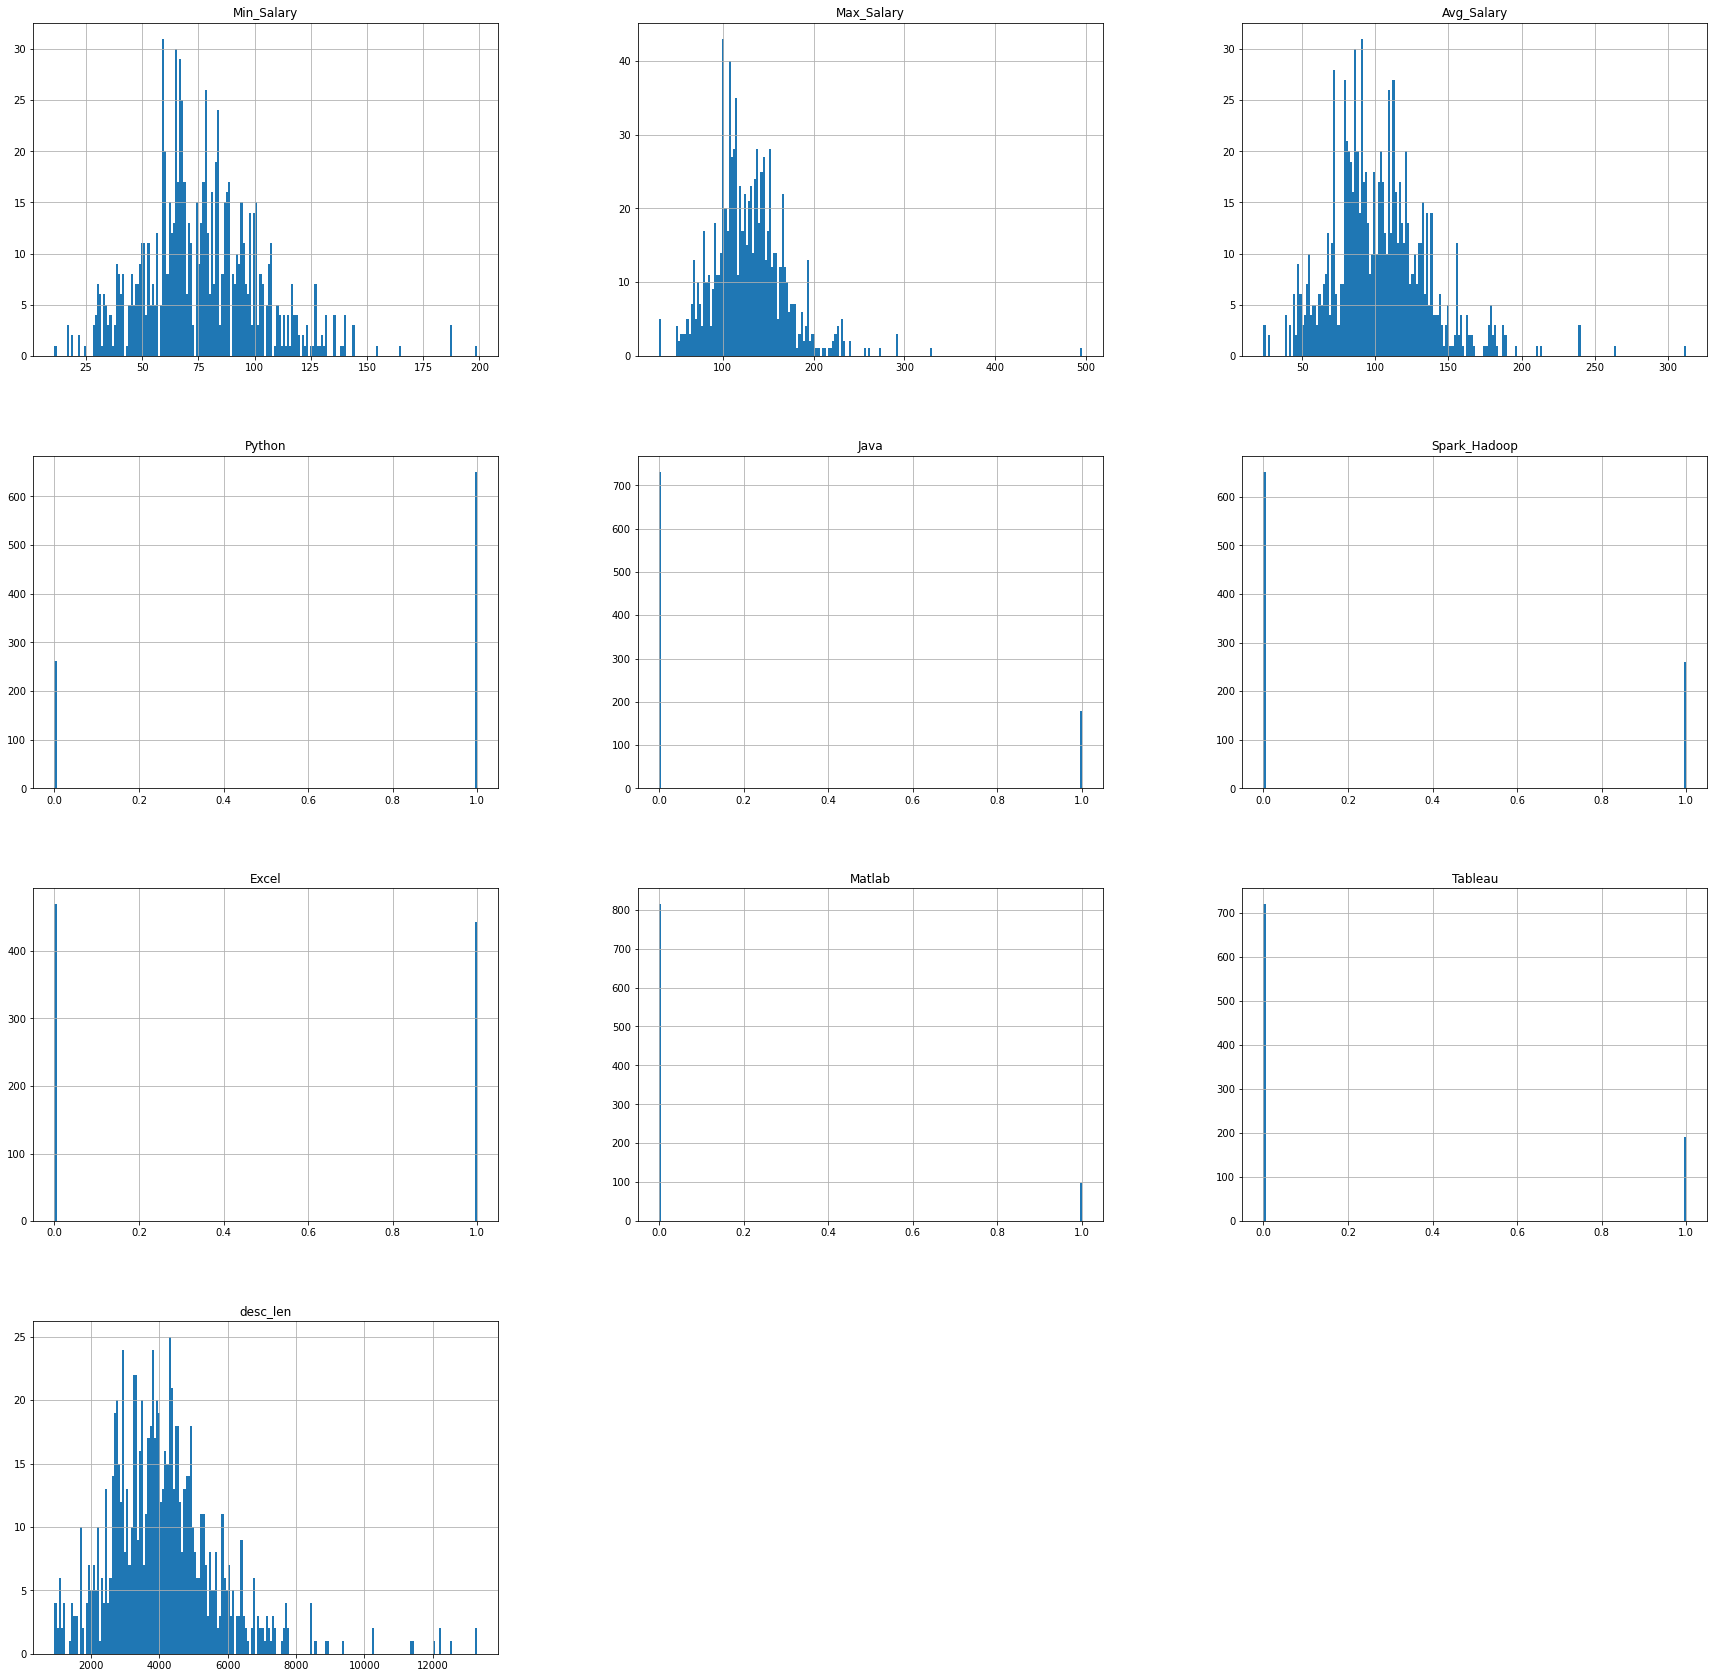

In [81]:
df.hist(bins = 200, figsize = (30,30))

As we can see, all the continuous values follows closely a normal distribution in a way. For the discrete values, we can see that Python is widely the most frequent requirement for a data related job.

<AxesSubplot:>

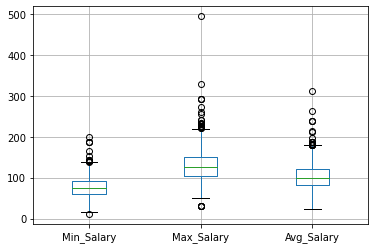

In [84]:
df[['Min_Salary','Max_Salary','Avg_Salary']].boxplot()

There are much more higher than lower outliers regarding salary. Also, we can see a really big outlier for the Max_Salary. Let's check this job in particular.

In [88]:
df[df['Max_Salary'] == df['Max_Salary'].max()]

Job_Title   Company  \
42  data scientist  Novartis   

                                      Job_Description   Job_Type Job_Function  \
42  10% or more of the world’s population is affec...  Full-time    physician   

                     Industry       N_Employees State  Min_Salary  Max_Salary  \
42  Biotech & Pharmaceuticals  10000+ Employees    MA         130         495   

    Avg_Salary  Python  Java  Spark_Hadoop  Excel  Matlab  Tableau  desc_len  
42       312.5       0     0             0      1       0        0      5863

<AxesSubplot:>

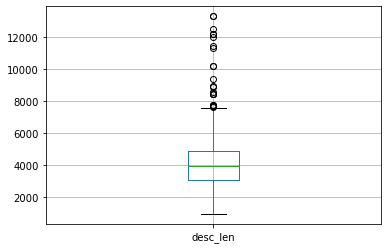

In [85]:
df[['desc_len']].boxplot()

Let's see the correlation of the numerical variables.

Text(0.5, 1.0, 'Correlation Heat Map')

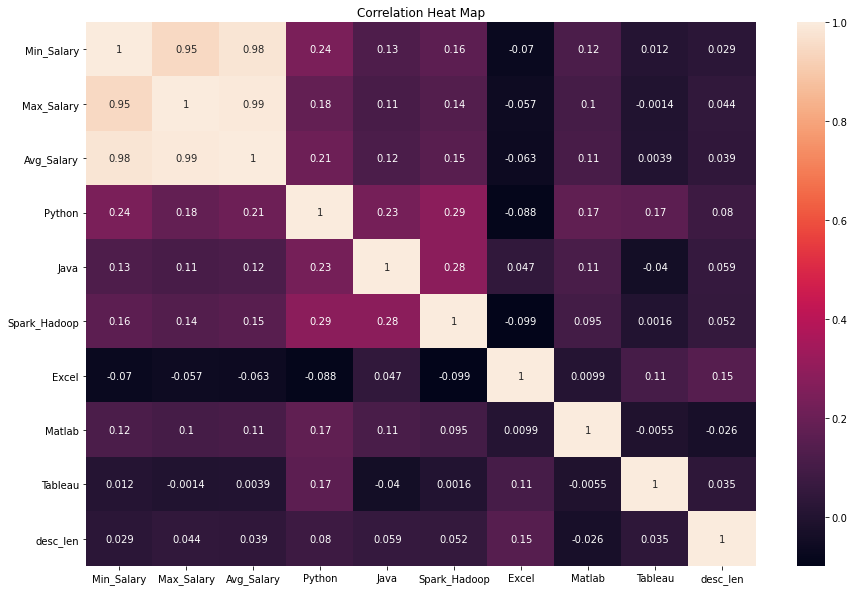

In [96]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Heat Map')

Of course Min_Salary and Max_Salary have extremelly high correlation with our target Avg_Salary. The skills Excell, Tableau and the lenght of the description have almost no corelation with the Avg_Salary.
One can see that the only really high correlation between predictors is between Min_Salary and Max_Salary, as expected.

Text(0, 0.5, 'Average Salary')

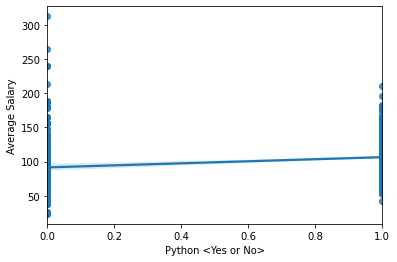

In [103]:
sns.regplot(x = df.Python, y = df.Avg_Salary, fit_reg = True)
plt.xlabel('Python <Yes or No>')
plt.ylabel('Average Salary')

We can see a clear correlation between the requirement of Python Skill and the Average Salary. Furthermore, the highest outliers tend to exclude Python.

Text(0, 0.5, 'Average Salary')

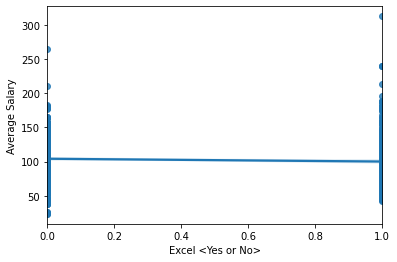

In [105]:
sns.regplot(x = df.Excel, y = df.Avg_Salary, fit_reg = True)
plt.xlabel('Excel <Yes or No>')
plt.ylabel('Average Salary')

Let's take a look at the categorical variables. Namely **State, N_Employees, Job_Title, Job_Type, Industry and Company.**

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job_Title        903 non-null    object 
 1   Company          912 non-null    object 
 2   Job_Description  912 non-null    object 
 3   Job_Type         912 non-null    object 
 4   Job_Function     912 non-null    object 
 5   Industry         886 non-null    object 
 6   N_Employees      912 non-null    object 
 7   State            912 non-null    object 
 8   Min_Salary       912 non-null    int64  
 9   Max_Salary       912 non-null    int64  
 10  Avg_Salary       912 non-null    float64
 11  Python           912 non-null    int64  
 12  Java             912 non-null    int64  
 13  Spark_Hadoop     912 non-null    int64  
 14  Excel            912 non-null    int64  
 15  Matlab           912 non-null    int64  
 16  Tableau          912 non-null    int64  
 17  desc_len        

In [141]:
df_cat = df[['State', 'N_Employees','Job_Title','Job_Type','Industry','Company']]
df_cat

State              N_Employees       Job_Title   Job_Type  \
0      IN         10000+ Employees  data scientist  Full-time   
1      VA  5001 to 10000 Employees  data scientist  Full-time   
2      CA    501 to 1000 Employees  data scientist  Full-time   
3      VA         10000+ Employees  data scientist  Full-time   
4      MD         10000+ Employees   data engineer  Full-time   
..    ...                      ...             ...        ...   
907    NY         10000+ Employees  data scientist  Full-time   
908    MO   1001 to 5000 Employees   data engineer  Full-time   
909    TX         10000+ Employees  data scientist  Full-time   
910    FL   1001 to 5000 Employees  data scientist  Full-time   
911    MA   1001 to 5000 Employees  data scientist  Full-time   

                      Industry                            Company  
0                Manufacturing             Stanley Black & Decker  
1            Business Services  ManTech International Corporation  
2                    Insurance                         SCAN Group  
3                  Health Care                Inova Health System  
4                    Insurance                              GEICO  
..                         ...                                ...  
907                      Media                       NBCUniversal  
908                Health Care                St. Luke's Hospital  
909     Information Technology                            Avanade  
910                    Finance                           Citibank  
911  Biotech & Pharmaceuticals                            ABIOMED  

[912 rows x 6 columns]

In [142]:
df_cat['N_Employees'] = df_cat['N_Employees'].apply(lambda x: x.split('E')[0])
df_cat['N_Employees'].value_counts()

<ipython-input-142-b3058db25490>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['N_Employees'] = df_cat['N_Employees'].apply(lambda x: x.split('E')[0])


10000+            272
1001 to 5000      182
201 to 500        114
51 to 200         108
501 to 1000       100
5001 to 10000      87
1 to 50            48
Unknown             1
Name: N_Employees, dtype: int64

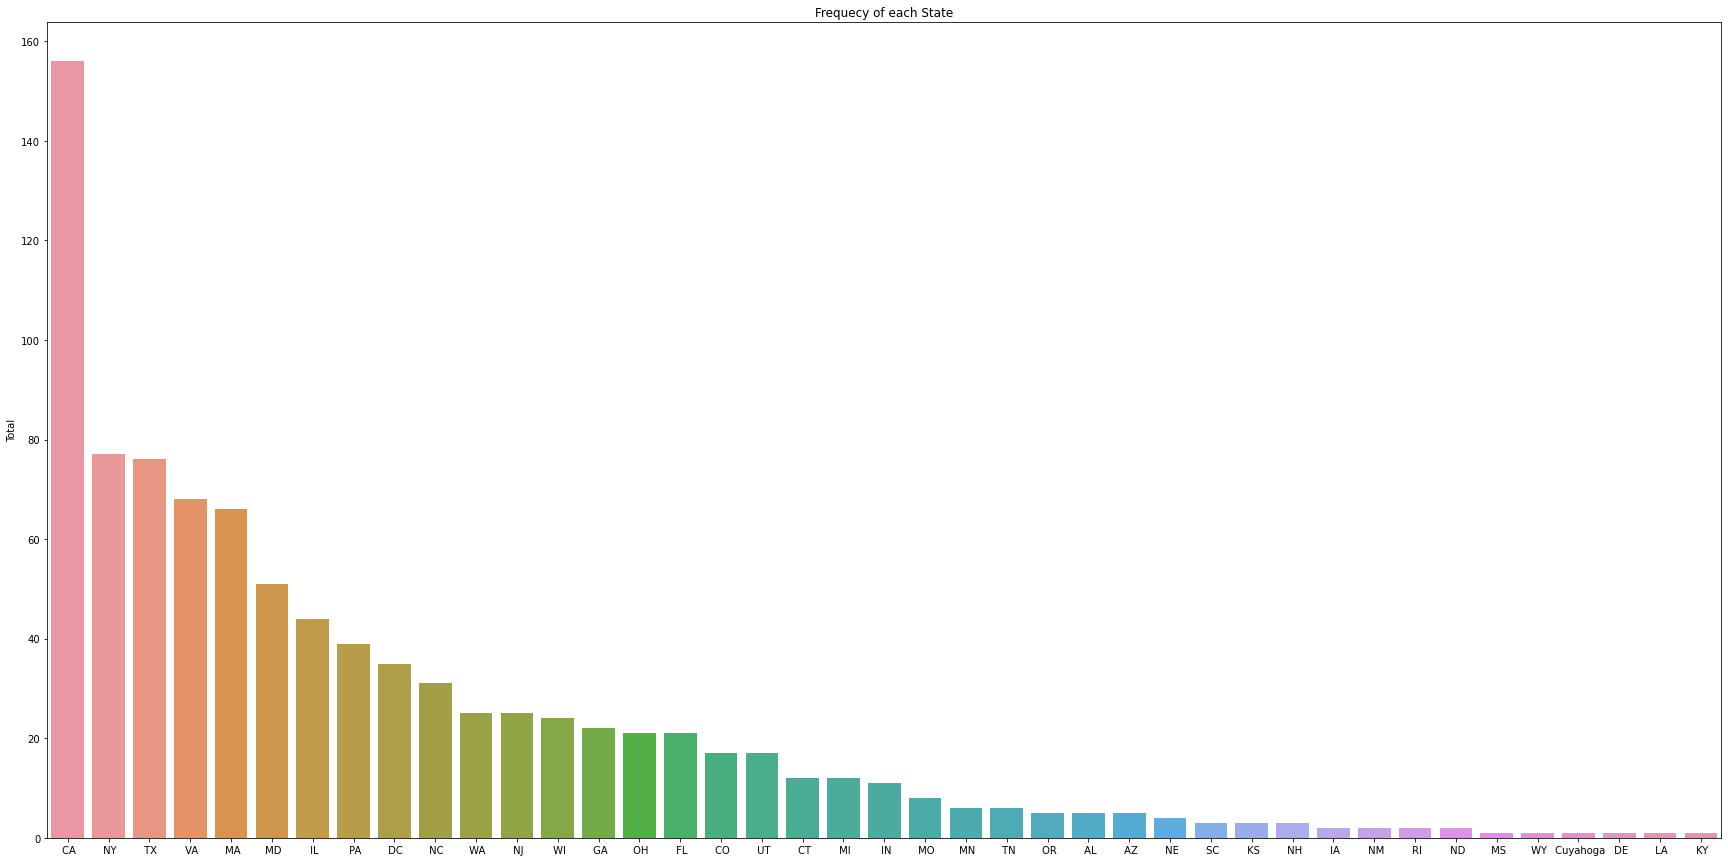

In [135]:
cat_num = df_cat['State'].value_counts()
plt.figure(figsize = (30,15))
sns.barplot(x=cat_num.index, y = cat_num)
plt.title('Frequecy of each State')
plt.ylabel('Total')
plt.show()

One can see that, by far, the most data related jobs are in the state of California. This number is almost identical to the jobs in the states of New York and Texas combined. 

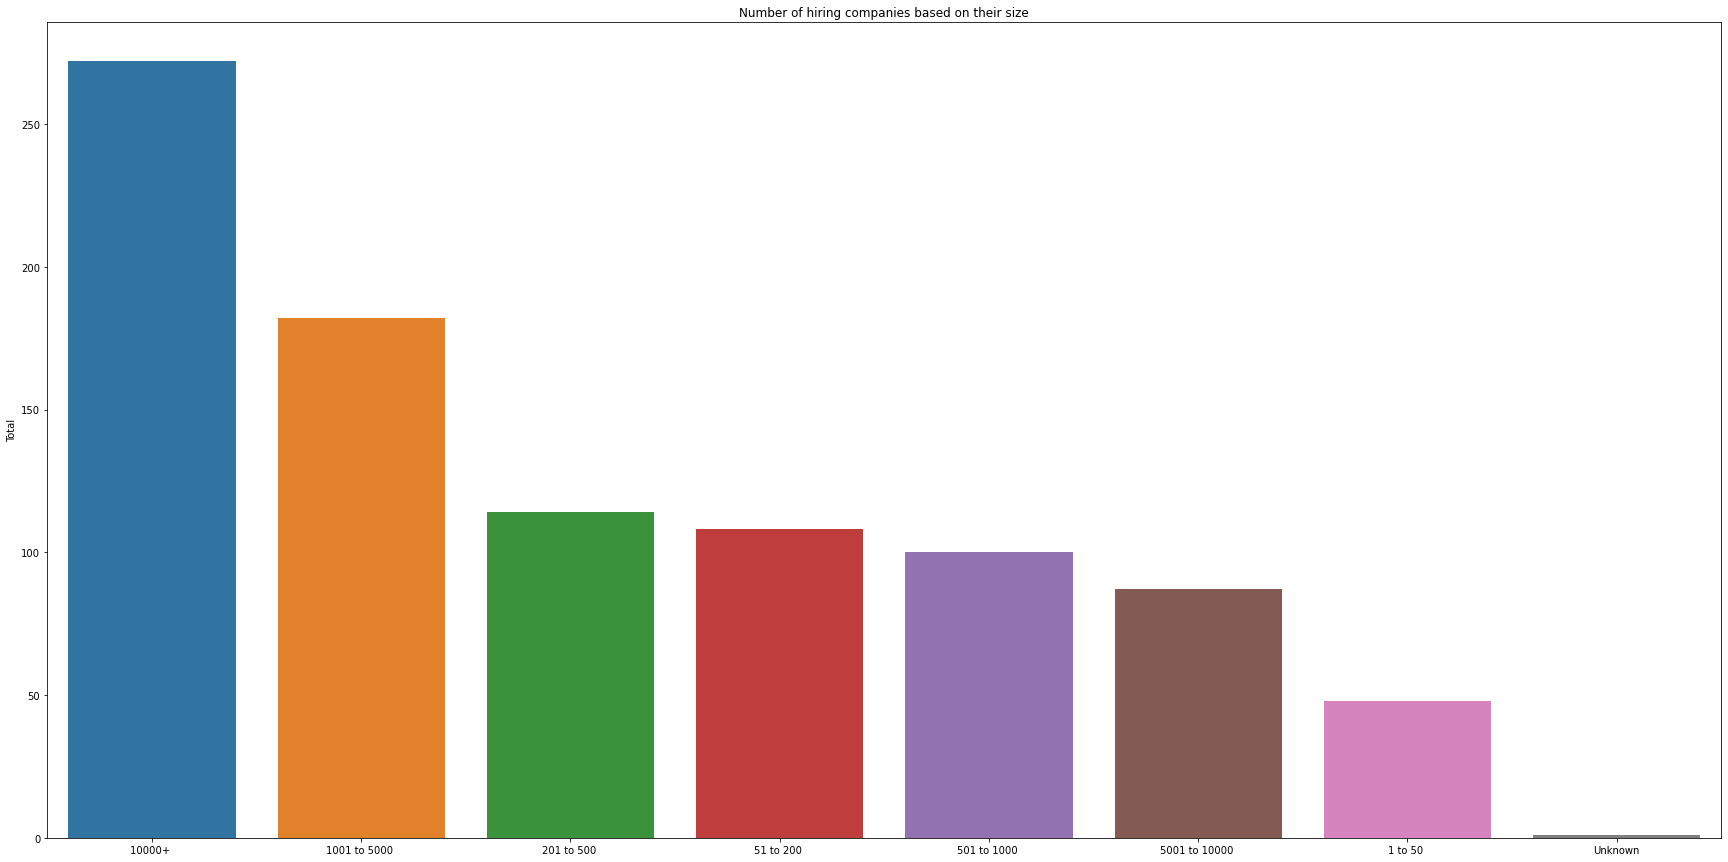

In [136]:
cat_num = df_cat['N_Employees'].value_counts()
plt.figure(figsize = (30,15))
sns.barplot(x=cat_num.index, y = cat_num)
plt.title('Number of hiring companies based on their size')
plt.ylabel('Total')
plt.show()

The trend is that the bigger companies are hiring more personal, as expected. However, there is not much difference between companies having between 201 to 1000 employees. 

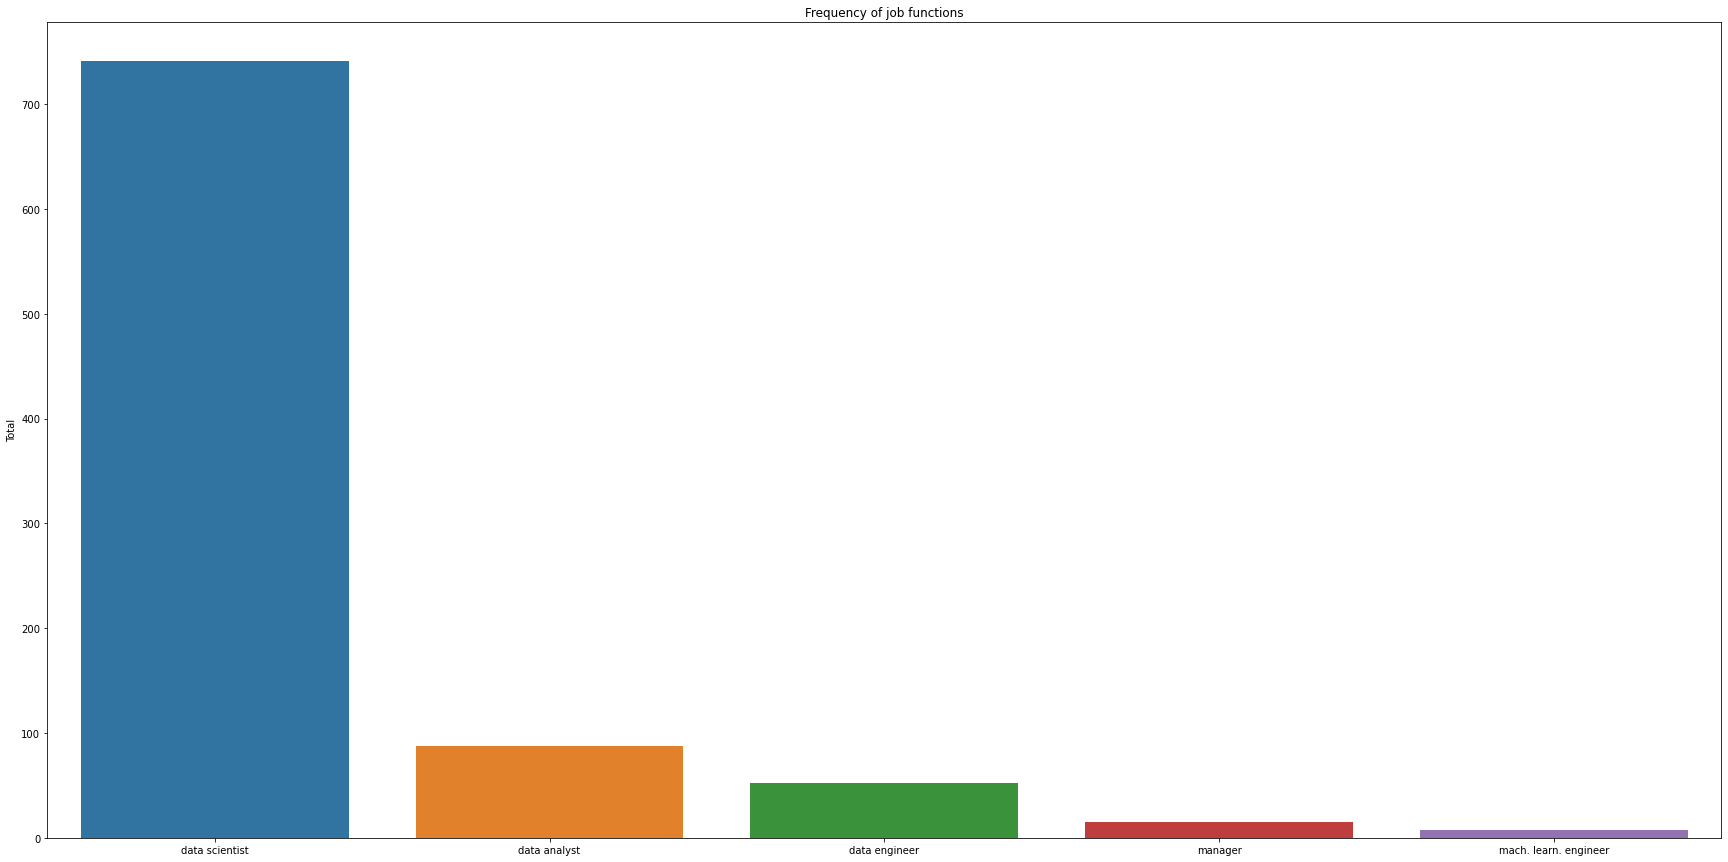

In [139]:
cat_num = df_cat['Job_Title'].value_counts()
plt.figure(figsize = (30,15))
sns.barplot(x=cat_num.index, y = cat_num)
plt.title('Frequency of job functions')
plt.ylabel('Total')
plt.show()

The majority of the data is set to jobs as data scientist. 

In [138]:
df.columns

Index(['Job_Title', 'Company', 'Job_Description', 'Job_Type', 'Job_Function',
       'Industry', 'N_Employees', 'State', 'Min_Salary', 'Max_Salary',
       'Avg_Salary', 'Python', 'Java', 'Spark_Hadoop', 'Excel', 'Matlab',
       'Tableau', 'desc_len'],
      dtype='object')

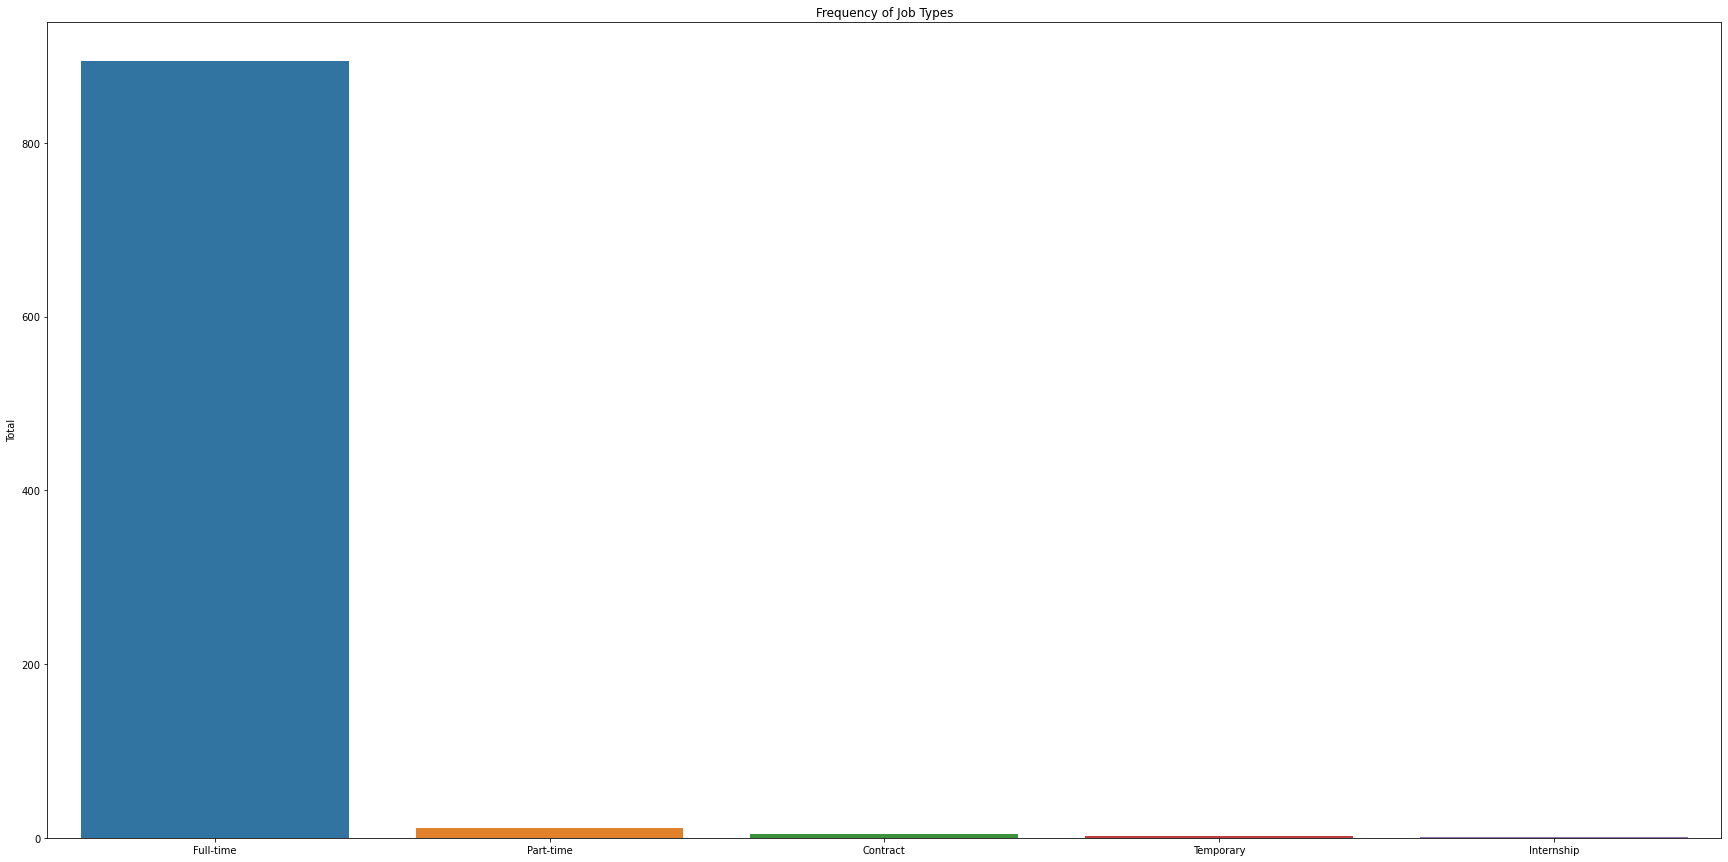

In [140]:
cat_num = df_cat['Job_Type'].value_counts()
plt.figure(figsize = (30,15))
sns.barplot(x=cat_num.index, y = cat_num)
plt.title('Frequency of Job Types')
plt.ylabel('Total')
plt.show()

The great majority of the dataset is related to Full-Time Jobs. 

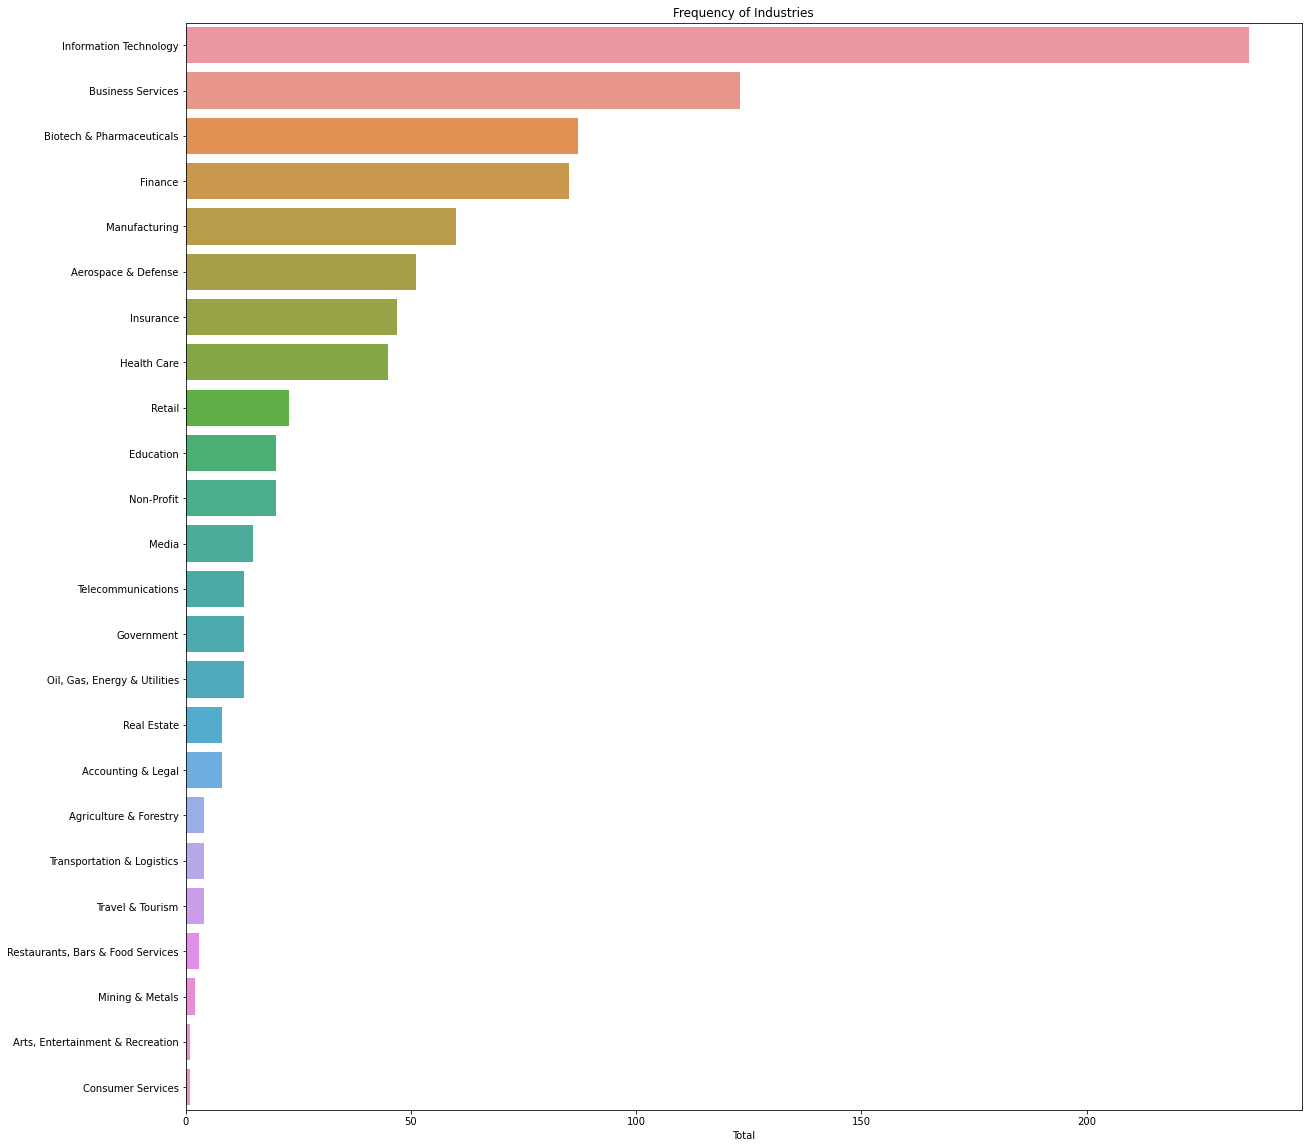

In [146]:
cat_num = df_cat['Industry'].value_counts()
plt.figure(figsize = (20,20))
sns.barplot(y=cat_num.index, x = cat_num)
plt.title('Frequency of Industries')
plt.xlabel('Total')
plt.show()

As expected the industry that is hiring the most data scientists is the Information Technology followed by Business Services. 

Let's plot the average salary for each State

In [169]:
df_s = df[['State', 'Avg_Salary']].groupby('State').mean()
df_s.head()

Avg_Salary
State            
 AL     96.700000
 AZ    100.200000
 CA    122.285256
 CO     94.852941
 CT     78.416667

In [172]:
df_s.reset_index(inplace = True)
df_s.head()

index State  Avg_Salary
0      0    AL   96.700000
1      1    AZ  100.200000
2      2    CA  122.285256
3      3    CO   94.852941
4      4    CT   78.416667

In [203]:
df_s.sort_values('Avg_Salary',ascending = False, inplace = True)

In [173]:
df_s.columns

Index(['index', 'State', 'Avg_Salary'], dtype='object')

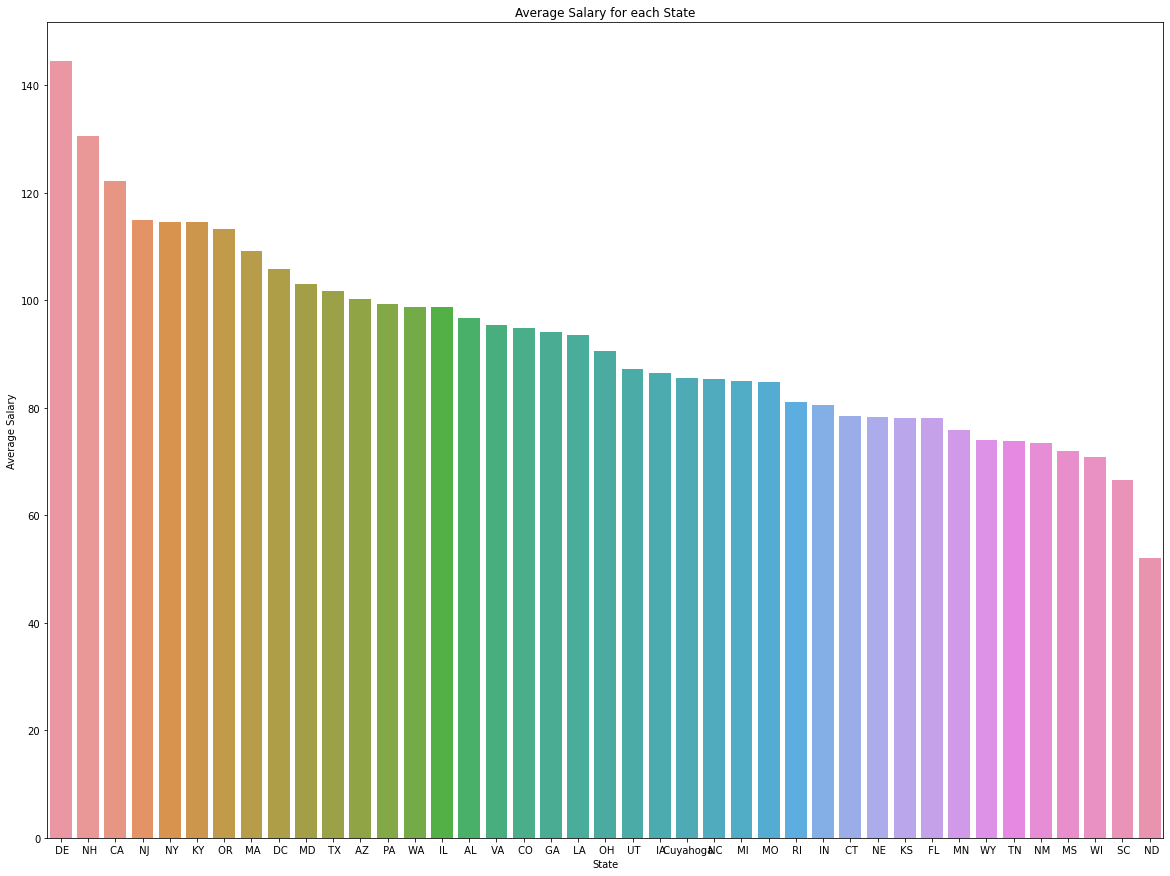

In [204]:
plt.figure(figsize = (20,15))
sns.barplot(x=df_s['State'], y = df_s['Avg_Salary'])
plt.title('Average Salary for each State')
plt.xlabel('State')
plt.ylabel('Average Salary')
plt.show()

Let's also plot the average Salary for each company in the dataset.

In [186]:
df_c = df[['Company', 'Avg_Salary']].groupby('Company').mean()
df_c.head()

Avg_Salary
Company                              
1010data                        101.0
22nd Century Technologies       128.5
23andMe                         104.5
2nd Ave Thrift Stores            53.5
3M                              123.0

In [187]:
df_c.reset_index(inplace = True)
df_c.head()

Company  Avg_Salary
0                   1010data       101.0
1  22nd Century Technologies       128.5
2                    23andMe       104.5
3      2nd Ave Thrift Stores        53.5
4                         3M       123.0

In [193]:
df_c.sort_values('Avg_Salary', ascending = False, inplace = True)
df_c.head()

Company  Avg_Salary
145             Daiichi Sankyo, Inc.       264.0
356              PRA Health Sciences       239.5
254              Jounce Therapeutics       213.5
256                     Jump Trading       196.0
220  Howard Hughes Medical Institute       187.5

In [194]:
df_c.columns

Index(['Company', 'Avg_Salary'], dtype='object')

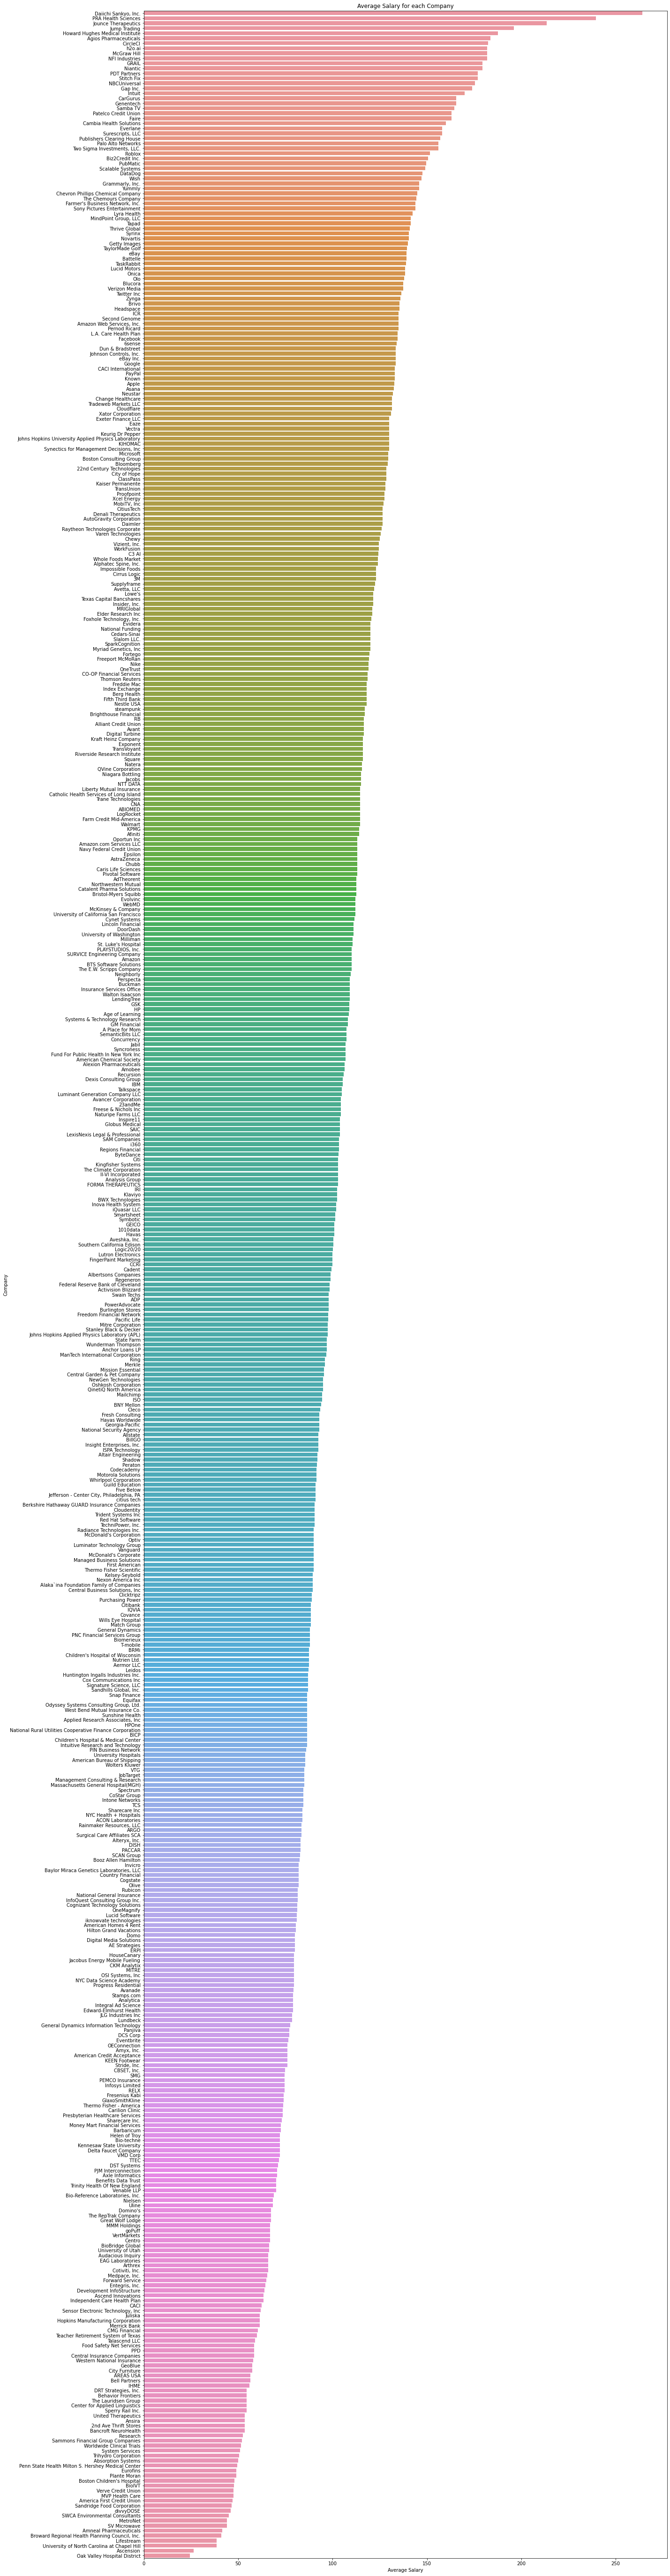

In [196]:
plt.figure(figsize = (20,100))
sns.barplot(y=df_c['Company'], x = df_c['Avg_Salary'])
plt.title('Average Salary for each Company')
plt.xlabel('Average Salary')
plt.ylabel('Company')
plt.show()

Let,s check for different industries average salary.

In [205]:
df.columns

Index(['Job_Title', 'Company', 'Job_Description', 'Job_Type', 'Job_Function',
       'Industry', 'N_Employees', 'State', 'Min_Salary', 'Max_Salary',
       'Avg_Salary', 'Python', 'Java', 'Spark_Hadoop', 'Excel', 'Matlab',
       'Tableau', 'desc_len'],
      dtype='object')

In [206]:
df_i = df[['Industry', 'Avg_Salary']].groupby('Industry').mean()
df_i.head()

Avg_Salary
Industry                                    
Accounting & Legal                 95.375000
Aerospace & Defense               102.764706
Agriculture & Forestry            110.125000
Arts, Entertainment & Recreation  140.000000
Biotech & Pharmaceuticals         106.862069

In [207]:
df_i.reset_index(inplace = True)
df_i.head()

Industry  Avg_Salary
0                Accounting & Legal   95.375000
1               Aerospace & Defense  102.764706
2            Agriculture & Forestry  110.125000
3  Arts, Entertainment & Recreation  140.000000
4         Biotech & Pharmaceuticals  106.862069

And now let's look at the salaries regarding different job functions

In [208]:
df_i.sort_values('Avg_Salary', ascending = False, inplace = True)
df_i.head()

Industry  Avg_Salary
3   Arts, Entertainment & Recreation  140.000000
14                             Media  133.500000
6                  Consumer Services  128.500000
15                   Mining & Metals  119.250000
20                            Retail  113.282609

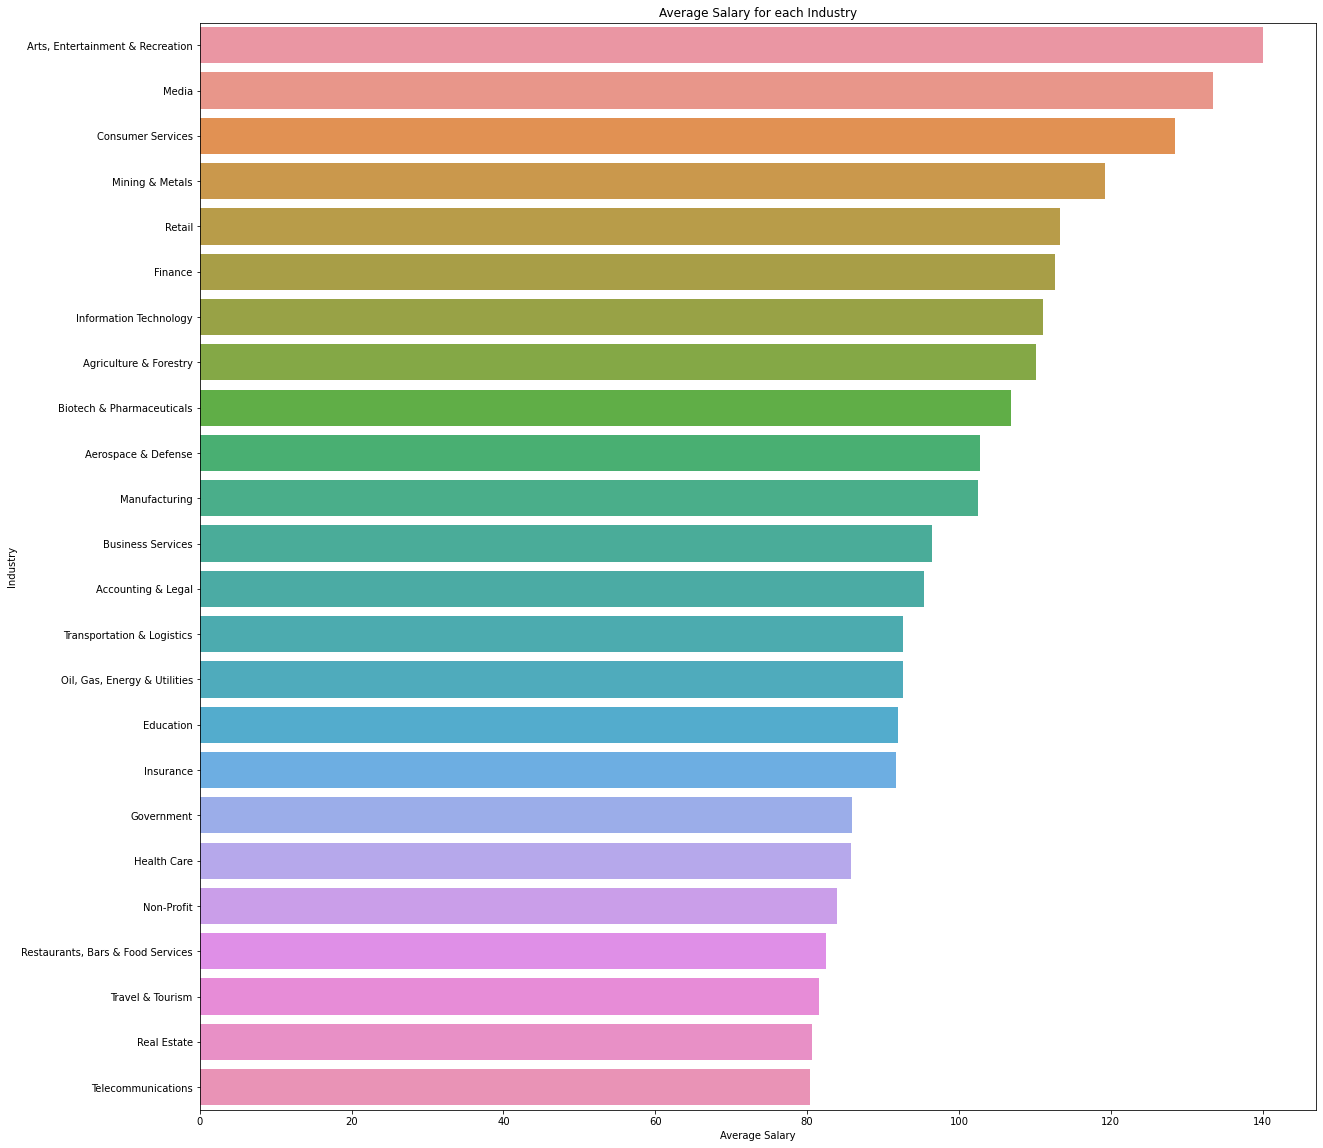

In [209]:
plt.figure(figsize = (20,20))
sns.barplot(y=df_i['Industry'], x = df_i['Avg_Salary'])
plt.title('Average Salary for each Industry')
plt.xlabel('Average Salary')
plt.ylabel('Industry')
plt.show()

In [213]:
df['Industry'].value_counts()

Information Technology               236
Business Services                    123
Biotech & Pharmaceuticals             87
Finance                               85
Manufacturing                         60
Aerospace & Defense                   51
Insurance                             47
Health Care                           45
Retail                                23
Education                             20
Non-Profit                            20
Media                                 15
Telecommunications                    13
Government                            13
Oil, Gas, Energy & Utilities          13
Real Estate                            8
Accounting & Legal                     8
Agriculture & Forestry                 4
Transportation & Logistics             4
Travel & Tourism                       4
Restaurants, Bars & Food Services      3
Mining & Metals                        2
Arts, Entertainment & Recreation       1
Consumer Services                      1
Name: Industry, 

The data set doesn't have a lot of instances for the industries who scored higher in the graph above, so the graph is not that significant.

In [198]:
df_f = pd.pivot_table(df, index = 'Job_Title', values = 'Avg_Salary')

In [199]:
df_f.reset_index(inplace = True)
df_f.head()

Job_Title  Avg_Salary
0           data analyst   64.727273
1          data engineer   96.307692
2         data scientist  107.502699
3  mach. learn. engineer   99.571429
4                manager   76.466667

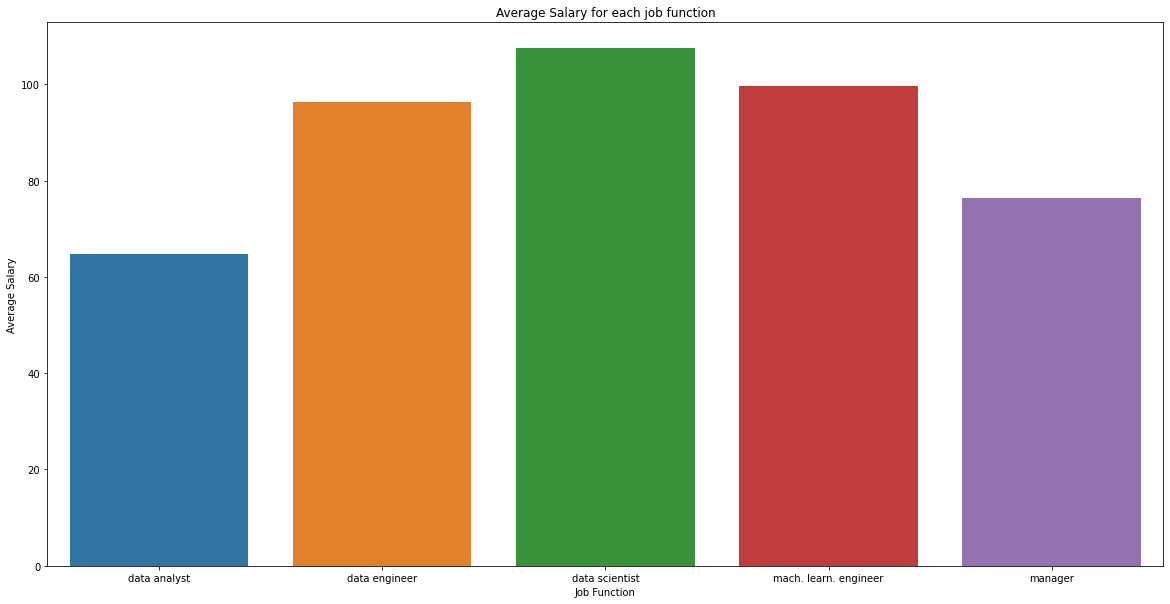

In [201]:
plt.figure(figsize = (20,10))
sns.barplot(x=df_f['Job_Title'], y= df_f['Avg_Salary'])
plt.title('Average Salary for each job function')
plt.xlabel('Job Function')
plt.ylabel('Average Salary')
plt.show()

One can clearly see that on average a data analyst has a substantially lower revenue than a data scientist, data engineer and machine learning engineer. It is a little bit surprising for me that a manager on average earns less than the three job functions stated above.

In [214]:
df['Job_Title'].value_counts()

data scientist           741
data analyst              88
data engineer             52
manager                   15
mach. learn. engineer      7
Name: Job_Title, dtype: int64

Now let's make a word cloud of the job descriptions to take a look at the most populated relevant words.

In [222]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

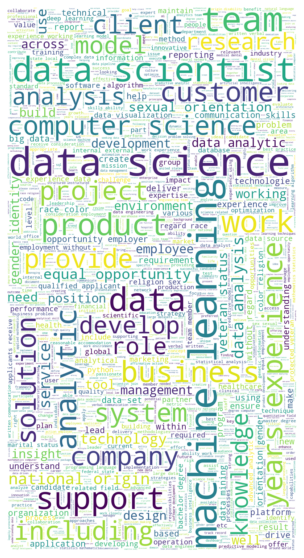

In [224]:
words = ' '.join(df['Job_Description'])

def punctuation_stop(text):
    """Remove punctuation and Stopwords"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color='white', random_state = 1, stopwords=STOPWORDS, max_words=2000, width=800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()





### Dealing with missing values

In [11]:
df.head()

Job_Title                            Company  \
0  data scientist             Stanley Black & Decker   
1  data scientist  ManTech International Corporation   
2  data scientist                         SCAN Group   
3  data scientist                Inova Health System   
4   data engineer                              GEICO   

                                     Job_Description   Job_Type  \
0  About Stanley Black & DeckerJoining the Stanle...  Full-time   
1  Secure our Nation, Ignite your FutureManTech i...  Full-time   
2  Data Scientist - HCILong Beach, CAFull-timeAbo...  Full-time   
3  Conduct bioinformatic analysis on research pro...  Full-time   
4  The Data Consumption team of Decision Sciences...  Full-time   

         Job_Function           Industry              N_Employees State  \
0      data scientist      Manufacturing         10000+ Employees    IN   
1      data scientist  Business Services  5001 to 10000 Employees    VA   
2      data scientist          Insurance    501 to 1000 Employees    CA   
3  research scientist        Health Care         10000+ Employees    VA   
4       data engineer          Insurance         10000+ Employees    MD   

   Min_Salary  Max_Salary  Avg_Salary  Python  Java  Spark_Hadoop  Excel  \
0          74         130       102.0       1     0             0      1   
1          70         116        93.0       1     1             1      0   
2          73         123        98.0       1     0             0      1   
3          66         138       102.0       0     0             0      0   
4          52         101        76.5       0     1             1      1   

   Matlab  Tableau  desc_len  
0       0        0      5988  
1       1        0      5625  
2       0        0      4756  
3       0        0      2450  
4       0        0      3955

Relevant columns

In [8]:
df.columns

Index(['Job_Title', 'Company', 'Job_Description', 'Job_Type', 'Job_Function',
       'Industry', 'N_Employees', 'State', 'Min_Salary', 'Max_Salary',
       'Avg_Salary', 'Python', 'Java', 'Spark_Hadoop', 'Excel', 'Matlab',
       'Tableau'],
      dtype='object')

In [127]:
df_model = df[['Job_Title', 'Industry', 'State', 'N_Employees', 'Job_Description', 'Python', 'Java', 'Spark_Hadoop', 'Excel', 'Matlab', 'Tableau','Avg_Salary']]

In [13]:
df_model.head()

Job_Title           Industry State              N_Employees  \
0  data scientist      Manufacturing    IN         10000+ Employees   
1  data scientist  Business Services    VA  5001 to 10000 Employees   
2  data scientist          Insurance    CA    501 to 1000 Employees   
3  data scientist        Health Care    VA         10000+ Employees   
4   data engineer          Insurance    MD         10000+ Employees   

                                     Job_Description  Python  Java  \
0  About Stanley Black & DeckerJoining the Stanle...       1     0   
1  Secure our Nation, Ignite your FutureManTech i...       1     1   
2  Data Scientist - HCILong Beach, CAFull-timeAbo...       1     0   
3  Conduct bioinformatic analysis on research pro...       0     0   
4  The Data Consumption team of Decision Sciences...       0     1   

   Spark_Hadoop  Excel  Matlab  Tableau  Avg_Salary  
0             0      1       0        0       102.0  
1             1      0       1        0        93.0  
2             0      1       0        0        98.0  
3             0      0       0        0       102.0  
4             1      1       0        0        76.5

Let's deal with missing values

In [14]:
df_model.isnull().sum()

Job_Title           9
Industry           26
State               0
N_Employees         0
Job_Description     0
Python              0
Java                0
Spark_Hadoop        0
Excel               0
Matlab              0
Tableau             0
Avg_Salary          0
dtype: int64

We only have missing values for the industry feature.

In [72]:
df_model['Industry'].value_counts(dropna = False)

Information Technology               236
Business Services                    123
Biotech & Pharmaceuticals             87
Finance                               85
Manufacturing                         60
Aerospace & Defense                   51
Insurance                             47
Health Care                           45
NaN                                   26
Retail                                23
Education                             20
Non-Profit                            20
Media                                 15
Oil, Gas, Energy & Utilities          13
Government                            13
Telecommunications                    13
Accounting & Legal                     8
Real Estate                            8
Transportation & Logistics             4
Travel & Tourism                       4
Agriculture & Forestry                 4
Restaurants, Bars & Food Services      3
Mining & Metals                        2
Arts, Entertainment & Recreation       1
Consumer Service

Let's try to fill the industry field. Bellow we se all the instances that have a null industry field.

In [73]:
df[(df_model['Industry'].isnull())]

Job_Title                                         Company  \
12   data scientist                      Sandridge Food Corporation   
16     data analyst                                           Uline   
35     data analyst                                           Uline   
57     data analyst                                           Uline   
83          manager                                           Uline   
88     data analyst                                           Uline   
108         manager                                           Uline   
136         manager                                           Uline   
192    data analyst                                           Uline   
195         manager                                           Uline   
198    data analyst                                           Uline   
205         manager                                           Uline   
244    data analyst                                           Uline   
253  data scientist        Alaka`ina Foundation Family of Companies   
258    data analyst                                           Uline   
302    data analyst                                           Uline   
475  data scientist                        Rainmaker Resources, LLC   
483    data analyst               Hopkins Manufacturing Corporation   
498  data scientist                                 ISPA Technology   
518    data analyst               Hopkins Manufacturing Corporation   
558  data scientist                        Rainmaker Resources, LLC   
621  data scientist                        Rainmaker Resources, LLC   
634    data analyst               Hopkins Manufacturing Corporation   
715    data analyst  Broward Regional Health Planning Council, Inc.   
875  data scientist                             Denali Therapeutics   
880  data scientist                                 ISPA Technology   

                                       Job_Description   Job_Type  \
12   POSITION SUMMARY:  Quality Assurance Technicia...  Full-time   
16   Data AnalystCorporate Headquarters12575 Uline ...  Full-time   
35   Data AnalystCorporate Headquarters12575 Uline ...  Full-time   
57   Supply Chain Data AnalystCorporate Headquarter...  Full-time   
83   Corporate Analytics ManagerCorporate Headquart...  Full-time   
88   Web Data AnalystCorporate Headquarters12575 Ul...  Full-time   
108  Customer Service Analytics ManagerMilwaukee Br...  Full-time   
136  Corporate Analytics ManagerCorporate Headquart...  Full-time   
192  Supply Chain Data AnalystCorporate Headquarter...  Full-time   
195  Corporate Analytics ManagerCorporate Headquart...  Full-time   
198  Web Data AnalystCorporate Headquarters12575 Ul...  Full-time   
205  Customer Service Analytics ManagerMilwaukee Br...  Full-time   
244  Supply Chain Data AnalystCorporate Headquarter...  Full-time   
253  Ke'aki Technologies, LLC is looking for a qual...  Full-time   
258  Data AnalystCorporate Headquarters12575 Uline ...  Full-time   
302  Supply Chain Data AnalystCorporate Headquarter...  Full-time   
475  Data ScientistAre you interested in joining th...  Full-time   
483  The e-commerce analyst will work with the Dire...  Full-time   
498  Do you want to join a fast-growing, dynamic co...  Full-time   
518  The e-commerce analyst will work with the Dire...  Full-time   
558  Data ScientistAre you interested in joining th...  Full-time   
621  Data ScientistAre you interested in joining th...  Full-time   
634  The e-commerce analyst will work with the Dire...  Full-time   
715  Broward Regional Health planning Council is co...  Full-time   
875  Data Scientist/Statistical Programmer (Six-mon...   Contract   
880  Do you want to join a fast-growing, dynamic co...  Full-time   

                        Job_Function Industry              N_Employees State  \
12                    food scientist      NaN     201 to 500 Employees    OH   
16                      data analyst      NaN  5001 to 10000 Employe

Let's see the job description of the job instances above to see if we can select a logical industry. One can do this selection based on the company itself.

In [74]:
df.loc[12,'Job_Description']

'POSITION SUMMARY:  Quality Assurance Technician performs all assigned food safety and quality research projects. Responsible for ensuring quality standards are being met by reviewing quality control checks on product per the Standard Operating Procedure guidelines.PRIMARY RESPONSIBILITIES: Primary responsibilities include but are not limited to the following:· Assist in designing of the food safety/ quality project to accomplish established goal· Works with production department to maintain compliance and troubleshoots quality issues, providing feedback and direction, working with leadership to ensure food safety and product quality.· Collect samples from production facilities as required.· Assist QA Department in testing raw material or finished products for pH, Titrate able Acidity, Moisture Analysis, water activity and other QA tasks.· Partner with all departments, executing and supporting all Quality programs that ensure the production of Safe, Quality Foods.· Take, record, and or

In [128]:
df_model.drop(index = 12, axis= 0, inplace=True)

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [76]:
df.loc[16,'Job_Description']

"Data AnalystCorporate Headquarters12575 Uline Dr. Pleasant Prairie, WI 53158We're passionate about our products because our customers rely on them to run their businesses.Better together than apart. This position is on-site, and we are looking for good people who share our passion.Uline is proud to operate as a drug-free workplace. All new hires must complete a pre-employment drug screening.Position ResponsibilitiesWrite SQL queries to retrieve sales, customer and product data.Perform ad hoc analysis and create reports to illustrate performance, answer business questions and provide recommendations.Apply basic and intermediate statistical methods (e.g. data aggregation, regression analysis, time series analysis, etc.) to solve business questions.Collaborate with pricing team members to create reports, analyses and presentations.Build relationships with the Merchandising and Logistics teams to develop trust and understand processes.Create what-if scenarios to quantify the impact due to

In [77]:
df.loc[[16, 35, 57, 83, 88, 108, 136, 192, 195, 198, 205,244, 258,302],:]

Job_Title Company                                    Job_Description  \
16   data analyst   Uline  Data AnalystCorporate Headquarters12575 Uline ...   
35   data analyst   Uline  Data AnalystCorporate Headquarters12575 Uline ...   
57   data analyst   Uline  Supply Chain Data AnalystCorporate Headquarter...   
83        manager   Uline  Corporate Analytics ManagerCorporate Headquart...   
88   data analyst   Uline  Web Data AnalystCorporate Headquarters12575 Ul...   
108       manager   Uline  Customer Service Analytics ManagerMilwaukee Br...   
136       manager   Uline  Corporate Analytics ManagerCorporate Headquart...   
192  data analyst   Uline  Supply Chain Data AnalystCorporate Headquarter...   
195       manager   Uline  Corporate Analytics ManagerCorporate Headquart...   
198  data analyst   Uline  Web Data AnalystCorporate Headquarters12575 Ul...   
205       manager   Uline  Customer Service Analytics ManagerMilwaukee Br...   
244  data analyst   Uline  Supply Chain Data AnalystCorporate Headquarter...   
258  data analyst   Uline  Data AnalystCorporate Headquarters12575 Uline ...   
302  data analyst   Uline  Supply Chain Data AnalystCorporate Headquarter...   

      Job_Type                     Job_Function Industry  \
16   Full-time                     data analyst      NaN   
35   Full-time                     data analyst      NaN   
57   Full-time                     data analyst      NaN   
83   Full-time                     data analyst      NaN   
88   Full-time                     data analyst      NaN   
108  Full-time  customer service representative      NaN   
136  Full-time                     data analyst      NaN   
192  Full-time                     data analyst      NaN   
195  Full-time                     data analyst      NaN   
198  Full-time                     data analyst      NaN   
205  Full-time  customer service representative      NaN   
244  Full-time                     data analyst      NaN   
258  Full-time                     data analyst      NaN   
302  Full-time                     data analyst      NaN   

                 N_Employees State  Min_Salary  Max_Salary  Avg_Salary  \
16   5001 to 10000 Employees    WI          65          79        72.0   
35   5001 to 10000 Employees    WI          50          92        71.0   
57   5001 to 10000 Employees    WI          46          81        63.5   
83   5001 to 10000 Employees    WI          67         119        93.0   
88   5001 to 10000 Employees    WI          65          79        72.0   
108  5001 to 10000 Employees    WI          17          30        23.5   
136  5001 to 10000 Employees    IL          67         119        93.0   
192  5001 to 10000 Employees    WI          46          81        63.5   
195  5001 to 10000 Employees    WI          67         119        93.0   
198  5001 to 10000 Employees    WI          65          79        72.0   
205  5001 to 10000 Employees    WI          17          30        23.5   
244  5001 to 10000 Employees    IL          65          79        72.0   
258  5001 to 10000 Employees    IL          65          79        72.0   
302  5001 to 10000 Employees    IL          65          79        72.0   

     Python  Java  Spark_Hadoop  Excel  Matlab  Tableau  
16        0     0             0      1       0        0  
35        0     0             0      1       0        0  
57        0     0             0      1       0        0  
83        1     0             0      1       0        0  
88        0     0             0      1       0        1  
108       0     0             0      0       0        0  
136       1     0             0      1       0        0  
192       0     0             0      1       0        0  
195       1     0             0      1       0        0  
198       0     0             0      1       0        1  
205       0     0             0      0       0        0  
244       0     0             0      1       0        0  
258       0     0             0      1   

In [78]:
df.loc[253,'Job_Description']

"Ke'aki Technologies, LLC is looking for a qualified Data Scientist to support the Air Force Medical Service (AFMS) in San Antonio, TX.RESPONSIBILITIES: Provide analytical tools and resources to assess the health of the Military Health System (MHS) beneficiary population.Provide technical expertise in the areas of prevention, managed care, medical readiness issues, health promotion, clinical safety and quality, and other health Service-related issues in order to support the DHA.Perform clinical and business analytical studies using accepted data science techniques to provide insight into areas of trending/improvement for prevention, managed care, medical readiness issues, health promotion, clinical safety and quality, and other health Service-related issues.Aggregate and analyze population health data to respond to questions from the various Congressional inquiries, DoD senior leaders, DHA, Services’ Surgeon General, Service-specific Headquarters agencies, and the MTFs.Access, validate

In [79]:
df.loc[475,'Job_Description']

'Data ScientistAre you interested in joining the fastest growing company in the city? Our client is newly international, hiring career aggressive high achievers to be the next generation of leaders. They offer highly competitive comp packages and fantastic PTO!\nDescriptionThe Data Scientist designs and develops methods and systems that have the ability to consolidate and analyze "big data" that generate insights to untapped client solutions. He/she will develop and code software programs, algorithms and automated processes to cleanse large datasets into meaningful information for gathering insight. By being able to draw conclusions from large, disparate sources of data, we can identify and pursue new areas of growth, preempt trends and continue our exponential growth.Making an impact isn\'t something reserved for people in corner offices. It comes from people in every corner of the office. People with ambition, optimism and courage. We provide growth and opportunity and give employees

In [80]:
df.loc[498,'Job_Description']

'Do you want to join a fast-growing, dynamic company working on the latest technology contracts across the country?\n\nISPA Technology is that company. We have been listed 4 years in a row on the Inc. 5000 Fastest Growing Companies. We offer a great company culture, competitive salary & bonus potential, a superior benefits package, and much more!\n\nJob Description:\n\nSeeking a Data Scientist to support United States Special Operations Command (USSOCOM) and the Intelligence Community (IC)\nJob Duties Include (but not limited to):\n\nSolve complex data problems, discovering fresh insights and delivering data to the user that is timely and establishes unparalleled trust and confidence in the data and services of our customers.\nWork closely with analytical cells to understand analyst behavior and their use of data, systems, and tools.\nProvide interpretation of new data sources relevant to our user community and recommend ways to apply the data to identify unique insights.\nIdentify and

In [81]:
df.loc[715,'Job_Description']

"Broward Regional Health planning Council is committed to health and human service innovation at the national, state and local level. We are seeking a dynamic, passionate and enthusiastic individual to lead our community needs assessment and health planning initiatives. The Health Planner reports directly to the President/CEO.Responsibilities· Analyzing, collecting, reporting, publishing and submitting hospital and nursing home utilization data.· Updating and publishing local health planning documents including the Broward County Health Plan, Health Profile, and Health Benchmark.· Working with outside consultants to assist with and facilitate special projects.· Coordinate and facilitate local community health needs assessments.· Conduct both qualitative and quantitative data analysis including, but not limited to, surveys, focus groups, and key informant interviews.· Develop and implement strategies to collect input from persons who represent the interests of the community served.· Fac

In [53]:
df.loc[875,'Job_Description']

"Data Scientist/Statistical Programmer (Six-month contract position)Denali Therapeutics is dedicated to developing breakthrough therapies for neurodegenerative diseases through our deep commitment to degeneration biology and principles of translational medicine.The OpportunityWe are seeking a Data Scientist/Statistical Programmer contractor with a keen interest in clinical trials, strong statistical programming and problem-solving skills to support our clinical development programs. As a member of the Biometrics team at Denali Therapeutics, the candidate will work closely with clinical study team members and fellow data scientists. The candidate will have the opportunity to help shape Denali's data and programming infrastructure; gain an in-depth understanding of drug development, experience working in a fast-moving industry environment, and gain subject domain knowledge in the field of neurodegeneration.ResponsibilitiesRepresent Biometrics on study execution teams. Study execution sup

In [129]:
df_model.loc[[16, 35, 57, 83, 88, 108, 136, 192, 195, 198, 205, 244, 253, 258, 302, 475, 483, 498, 
             518, 558, 621, 634, 715, 875, 880],'Industry'] = ['Retail', 'Retail', 'Retail','Retail',
                                                               'Retail','Retail','Retail','Retail','Retail','Retail','Retail',
                                                               'Retail', 'Health Care', 'Retail', 'Retail', 'Business Services',
                                                              'Manufacturing', 'Information Technology', 'Manufacturing', 'Business Services',
                                                              'Business Services', 'Manufacturing', 'Health Care', 'Biotech & Pharmaceutica',
                                                              'Information Technology']

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [17]:
df_model['Industry'].value_counts(dropna = False)

Information Technology               238
Business Services                    126
Biotech & Pharmaceuticals             87
Finance                               85
Manufacturing                         63
Aerospace & Defense                   51
Insurance                             47
Health Care                           47
Retail                                37
Non-Profit                            20
Education                             20
Media                                 15
Government                            13
Telecommunications                    13
Oil, Gas, Energy & Utilities          13
Real Estate                            8
Accounting & Legal                     8
Agriculture & Forestry                 4
Travel & Tourism                       4
Transportation & Logistics             4
Restaurants, Bars & Food Services      3
Mining & Metals                        2
Consumer Services                      1
Biotech & Pharmaceutica                1
Arts, Entertainm

In [130]:
df_model.isnull().sum()

Job_Title          9
Industry           0
State              0
N_Employees        0
Job_Description    0
Python             0
Java               0
Spark_Hadoop       0
Excel              0
Matlab             0
Tableau            0
Avg_Salary         0
dtype: int64

Now we only have 9 zero entries regarding the job titles. They should be fairly easy to fill reading the respective job description.

In [85]:
df_model[df_model['Job_Title'].isnull()]

Job_Title                Industry State             N_Employees  \
79        NaN               Insurance    WA        10000+ Employees   
113       NaN                 Finance    TX  1001 to 5000 Employees   
280       NaN                 Finance    NY     51 to 200 Employees   
285       NaN                 Finance    NY     51 to 200 Employees   
287       NaN                 Finance    IL   501 to 1000 Employees   
291       NaN  Information Technology    NY       1 to 50 Employees   
440       NaN             Health Care    NM        10000+ Employees   
493       NaN              Non-Profit    DC     51 to 200 Employees   
868       NaN              Non-Profit    DC     51 to 200 Employees   

                                       Job_Description  Python  Java  \
79   At Liberty Mutual, our purpose is to help peop...       1     1   
113  At Exeter Finance, we are committed to helping...       0     0   
280  Experience: Entry-level (PhD Program) or Exper...       1     0   
285  Experience: Entry-level (PhD Program) or Exper...       1     0   
287  This person will be part of a centralized team...       1     0   
291  BICP, a market leader in BI&A and Cloud Transf...       0     0   
440  Overview:Job DescriptionType of Opportunity: F...       0     0   
493  The Language Assessment Division of the Center...       0     0   
868  The Language Assessment Division of the Center...       0     0   

     Spark_Hadoop  Excel  Matlab  Tableau  Avg_Salary  
79              0      0       0        0        58.0  
113             0      0       0        0       130.0  
280             0      1       1        0       177.0  
285             0      1       1        0       177.0  
287             0      1       0        0       196.0  
291             0      0       0        0        86.5  
440             0      1       0        0        45.0  
493             0      0       0        0        54.5  
868             0      0       0        0        54.5

In [87]:
df_model.loc[79,'Job_Description']

"At Liberty Mutual, our purpose is to help people embrace today and confidently pursue tomorrow. That’s why we provide an environment focused on openness, inclusion, trust and respect. Here, you’ll discover our expansive range of roles, and a workplace where we aim to help turn your passion into a rewarding profession. We value your hard work, integrity and commitment to make things better, and we put people first by offering you benefits that support your life and well-being. To learn more, please visit https://www.libertymutualgroup.com/about-lm/careers/benefitsLiberty Mutual has proudly been recognized as a “Great Place to Work” by Great Place to Work® US for the past several years. We were also selected as one of the “100 Best Places to Work in IT” on IDG’s Insider Pro and Computerworld’s 2020 list. We have been named by Forbes as one of America’s Best Employers for Women and one of America’s Best Employers for New Graduates—as well as one of America’s Best Employers for Diversity.

In [89]:
df_model.loc[113,'Job_Description']

"At Exeter Finance, we are committed to helping customers find the right financing for their next vehicle purchase. By building strong relationships with our customers and network of dealer partners we are able to give options that make sense, getting customers behind the wheel of their car.Every team member is integral to our success. Whether you’re at a servicing center helping customers with their loans, in the field building relationships with dealers, or supporting the company from its corporate offices, you'll enjoy a nurturing, invigorating and positive work environment.Our vision is to be a premier finance company and lender of choice known for its People, Performance and Service.Job DescriptionDesign and documentation of logical and physical analytical data models for transactional and analytical databases.Works closely with Data Stewards, Data Governance and developers to create and maintain data dictionary and data lineage. Helps investigate and resolve data anomalies includ

In [90]:
df_model.loc[280,'Job_Description']

"Experience: Entry-level (PhD Program) or Experienced (Postdoc, Faculty, Scientific Lab, Finance Industry)\n\nEducation: PhD in Math, Science, or Engineering disciplines\nThe PDT team - a quantitative investment manager - is hiring new or recent PhD graduates and experienced researchers (postdoctoral fellows, faculty, scientific lab, finance industry) to create and improve proprietary trading models and strategies while working closely with a deep bench of senior researchers.\n\nWe have a highly successful record of hiring, challenging, and retaining talented researchers from diverse academic backgrounds. Individuals interested in conducting innovative research with real-world impact seem to enjoy and excel at the types of problems we like to solve.\n\nPDT Researchers work in small, nimble teams where merit and contribution, not seniority, drive the discussion. We strive to foster an intellectually challenging environment that encourages collaboration and innovative ideas.\n\nIn our re

In [91]:
df_model.loc[285,'Job_Description']

"Experience: Entry-level (PhD Program) or Experienced (Postdoc, Faculty, Scientific Lab, Finance Industry)\n\nEducation: PhD in Math, Science, or Engineering disciplines\nThe PDT team - a quantitative investment manager - is hiring new or recent PhD graduates and experienced researchers (postdoctoral fellows, faculty, scientific lab, finance industry) to create and improve proprietary trading models and strategies while working closely with a deep bench of senior researchers.\n\nWe have a highly successful record of hiring, challenging, and retaining talented researchers from diverse academic backgrounds. Individuals interested in conducting innovative research with real-world impact seem to enjoy and excel at the types of problems we like to solve.\n\nPDT Researchers work in small, nimble teams where merit and contribution, not seniority, drive the discussion. We strive to foster an intellectually challenging environment that encourages collaboration and innovative ideas.\n\nIn our re

In [92]:
df_model.loc[287,'Job_Description']

"This person will be part of a centralized team that is responsible for the Market Simulator research tool sets and data sets that are utilized by the Jump trading community. Jump's simulation platform is a unique, high performance system which provides traders a competitive edge to successfully optimize and execute their strategies.\n\nWhat you'll do:\n\nYou will be actively involved in research projects associated with latency and available liquidity prediction as well as algorithmic improvement based on requirements provided by our internal trading teams. You will need to be successful at determining efficient methods to store and analyze very large amounts of data and develop tools to evaluate the large volume of market data to help improve trading strategies performance.\n\n\nPartner directly with the internal trading teams to build and enhance market prediction models utilizing quantitative problem solving and advanced statistical techniques.\nInvestigating and designing data min

In [93]:
df_model.loc[291,'Job_Description']

"BICP, a market leader in BI&A and Cloud Transformation, is looking to hire a Sr. Data Modeler to support a multi-year enterprise modernization effort at our longstanding Fortune 500 Consumer Products client in Long Island City, NY. We currently have a team on-site supporting multiple groups with their drive to deploy NextGen platforms and applications capable of powering real time analytics. The Data Modeler/Architect will be part of a new squad focused primarily on delivering new functionality associated with Supply Chain data. Ideal consultant will have at least 5 years Data Modeling, extensive ERWIN expertise and, in general, be familiar with a variety of techniques to consume and process large data volumes/datasets.Ideal candidate will have experience with name based architecture, domain definitions and deep data warehouse expertise (Teradata, SQL Server, DB2 etc). The mapping effort will involve numerous data sources touching a variety of data including Finance, Supply Chain, Pro

In [94]:
df_model.loc[440,'Job_Description']

"Overview:Job DescriptionType of Opportunity: Full TimeFTE: 1.000000Exempt: YesWork Schedule: DaysSummary:This position exists to ensure the oversight and compliance with Health plan coding policies and procedures; compliance to all external regulatory agency coding rules and regulations. Responsibilities include review and recommend compliance of coding policies and procedures for the Health Plan as it pertains to the Coding Editing System. Compliance with all external regulatory agencies (CMS, HSD, etc.), in regards to coding rules and regulations and work directly with the coding rule developer/manager to implement regulatory guidelines into the Coding Editing System; Provides coding specific education to internal workgroups, providers, and clinical personnel in regards to compliance with health plan policies and regulatory agencies; Assisting other Health Plan Departments in answering coding questions.Responsibilities:Liaison to the Provider Network, Claims, Health Services, Config

In [95]:
df_model.loc[493,'Job_Description']

'The Language Assessment Division of the Center for Applied Linguistics has occasional need for qualified consultants to work with the Psychometrics and Quantatitive Research team. We accept CVs from professionals with Master’s degrees in statistics or other fields with strong quantitative content, or with PhDs in educational measurement. We also accept CVs from PhD candidates.\n\nConsultants may be tasked with completing analyses, replicating analyses for quality control purposes, or supporting the production of technical reports.\n\nEssential skills include experience producing analyses in a professional setting using SPSS and R. Desired skills also include experience with Rasch analysis and DIF analysis. Experience with language assessment is also a plus.\n\nApplication Process\n\nEmail a CV and cover letter indicating your experience with the skills listed above to jobs@cal.org, with the subject line: Psychometrics and Quantitative Research Consulting.\n\nCAL will add your informat

In [96]:
df_model.loc[868,'Job_Description']

'The Language Assessment Division of the Center for Applied Linguistics has occasional need for qualified consultants to work with the Psychometrics and Quantatitive Research team. We accept CVs from professionals with Master’s degrees in statistics or other fields with strong quantitative content, or with PhDs in educational measurement. We also accept CVs from PhD candidates.\n\nConsultants may be tasked with completing analyses, replicating analyses for quality control purposes, or supporting the production of technical reports.\n\nEssential skills include experience producing analyses in a professional setting using SPSS and R. Desired skills also include experience with Rasch analysis and DIF analysis. Experience with language assessment is also a plus.\n\nApplication Process\n\nEmail a CV and cover letter indicating your experience with the skills listed above to jobs@cal.org, with the subject line: Psychometrics and Quantitative Research Consulting.\n\nCAL will add your informat

In [88]:
df_model['Job_Title'].unique()

array(['data scientist', 'data engineer', 'data analyst', nan, 'manager',
       'mach. learn. engineer'], dtype=object)

In [131]:
df_model.loc[[79, 113, 280, 285, 287, 291], 'Job_Title']=['data scientist', 'data scientist', 'data scientist',
                                                     'mach. learn. engineer', 'data scientist', 'data scientist']

In [20]:
df_model['Job_Title'].isnull().sum()

3

In [100]:
df_model.shape

(911, 12)

In [132]:
df_model.drop(index = [291, 440, 493], axis = 0, inplace = True)

In [104]:
df_model.shape

(908, 12)

In [133]:
df_model.isnull().sum()

Job_Title          1
Industry           0
State              0
N_Employees        0
Job_Description    0
Python             0
Java               0
Spark_Hadoop       0
Excel              0
Matlab             0
Tableau            0
Avg_Salary         0
dtype: int64

In [106]:
df_model[df_model['Job_Title'].isnull()]

Job_Title    Industry State          N_Employees  \
868       NaN  Non-Profit    DC  51 to 200 Employees   

                                       Job_Description  Python  Java  \
868  The Language Assessment Division of the Center...       0     0   

     Spark_Hadoop  Excel  Matlab  Tableau  Avg_Salary  
868             0      0       0        0        54.5

In [134]:
df_model.drop(index = 868, axis = 0, inplace = True)

In [60]:
df_model.shape

(907, 12)

In [135]:
df_model.isnull().sum()

Job_Title          0
Industry           0
State              0
N_Employees        0
Job_Description    0
Python             0
Java               0
Spark_Hadoop       0
Excel              0
Matlab             0
Tableau            0
Avg_Salary         0
dtype: int64

The dataset has no null values now. Let's also check from strange entries for all columns

In [25]:
df_model.columns

Index(['Job_Title', 'Industry', 'State', 'N_Employees', 'Job_Description',
       'Python', 'Java', 'Spark_Hadoop', 'Excel', 'Matlab', 'Tableau',
       'Avg_Salary'],
      dtype='object')

In [27]:
df_model['Job_Title'].unique()

array(['data scientist', 'data engineer', 'data analyst', 'manager',
       'mach. learn. engineer', 'datas scientist'], dtype=object)

In [28]:
df_model['Industry'].unique()

array(['Manufacturing', 'Business Services', 'Insurance', 'Health Care',
       'Transportation & Logistics', 'Aerospace & Defense', 'Finance',
       'Telecommunications', 'Accounting & Legal', 'Retail',
       'Mining & Metals', 'Biotech & Pharmaceuticals', 'Real Estate',
       'Information Technology', 'Travel & Tourism', 'Non-Profit',
       'Oil, Gas, Energy & Utilities', 'Education',
       'Restaurants, Bars & Food Services', 'Government', 'Media',
       'Consumer Services', 'Agriculture & Forestry',
       'Arts, Entertainment & Recreation', 'Biotech & Pharmaceutica'],
      dtype=object)

In [136]:
df_model['State'].unique()

array([' IN', ' VA', ' CA', ' MD', ' KS', ' WI', ' CT', ' MI', ' MO',
       ' IL', ' AZ', ' TX', ' NJ', ' MA', ' MN', ' NC', ' CO', ' FL',
       ' DC', ' NY', ' KY', ' TN', ' IA', ' NE', ' WA', ' PA', ' OH',
       ' UT', ' GA', ' OR', ' ND', ' SC', ' NM', ' MS', ' WY', ' AL',
       ' LA', ' DE', ' NH', ' Cuyahoga', ' RI'], dtype=object)

We have an entry 'Cuyahoga', which is part of the state of Ohio (OH), so one needs to change that.


In [137]:
df_model[df_model['State'] ==' Cuyahoga']
df_model.loc[797, 'State'] = 'OH'

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [138]:
df_model['State'].unique()

array([' IN', ' VA', ' CA', ' MD', ' KS', ' WI', ' CT', ' MI', ' MO',
       ' IL', ' AZ', ' TX', ' NJ', ' MA', ' MN', ' NC', ' CO', ' FL',
       ' DC', ' NY', ' KY', ' TN', ' IA', ' NE', ' WA', ' PA', ' OH',
       ' UT', ' GA', ' OR', ' ND', ' SC', ' NM', ' MS', ' WY', ' AL',
       ' LA', ' DE', ' NH', 'OH', ' RI'], dtype=object)

In [139]:
df_model['N_Employees'].unique()

array(['10000+ Employees', '5001 to 10000 Employees',
       '501 to 1000 Employees', '201 to 500 Employees',
       '1001 to 5000 Employees', '51 to 200 Employees',
       '1 to 50 Employees', 'Unknown'], dtype=object)

In [140]:
df_model['N_Employees'].value_counts()

10000+ Employees           271
1001 to 5000 Employees     182
201 to 500 Employees       113
51 to 200 Employees        106
501 to 1000 Employees      100
5001 to 10000 Employees     87
1 to 50 Employees           47
Unknown                      1
Name: N_Employees, dtype: int64

Let's drop the instance with the Unknown entry for the predictor Number of Employees.

In [141]:
df_model[df_model['N_Employees']=='Unknown']

Job_Title    Industry State N_Employees  \
388  data scientist  Government    MD     Unknown   

                                       Job_Description  Python  Java  \
388  Job SummaryNSA is in search of Computer Scienc...       0     0   

     Spark_Hadoop  Excel  Matlab  Tableau  Avg_Salary  
388             0      0       0        0        93.0

In [142]:
df_model = df_model.drop(index = 388, axis = 0)

In [143]:
df_model['N_Employees'].value_counts()

10000+ Employees           271
1001 to 5000 Employees     182
201 to 500 Employees       113
51 to 200 Employees        106
501 to 1000 Employees      100
5001 to 10000 Employees     87
1 to 50 Employees           47
Name: N_Employees, dtype: int64

In [144]:
df_model.columns

Index(['Job_Title', 'Industry', 'State', 'N_Employees', 'Job_Description',
       'Python', 'Java', 'Spark_Hadoop', 'Excel', 'Matlab', 'Tableau',
       'Avg_Salary'],
      dtype='object')

In [88]:
df_model['Python'].value_counts()

1    651
0    255
Name: Python, dtype: int64

In [89]:
df_model['Java'].value_counts()

0    726
1    180
Name: Java, dtype: int64

In [90]:
df_model['Spark_Hadoop'].value_counts()

0    646
1    260
Name: Spark_Hadoop, dtype: int64

In [91]:
df_model['Excel'].value_counts()

0    464
1    442
Name: Excel, dtype: int64

In [92]:
df_model['Matlab'].value_counts()

0    808
1     98
Name: Matlab, dtype: int64

In [93]:
df_model['Tableau'].value_counts()

0    714
1    192
Name: Tableau, dtype: int64

In [95]:
df_model['Avg_Salary'].unique()

array([102. ,  93. ,  98. ,  76.5, 137. ,  54.5, 107.5,  63.5,  47.5,
        44. ,  86.5,  49. ,  66. , 124.5,  72. , 133.5,  79. ,  67. ,
        58. ,  56.5,  53.5,  91. , 158. ,  82.5,  87. , 115. , 116.5,
       128. , 121. , 105. ,  71. ,  41.5,  84. ,  67.5, 114.5,  96. ,
       312.5, 109. ,  93.5,  24.5, 138.5,  74.5,  60.5,  46. ,  90.5,
       101. , 112.5, 239.5, 140.5, 133. ,  68.5,  80.5, 119.5,  45. ,
        64.5,  65.5,  50.5, 121.5, 104.5, 139.5, 118. ,  47. ,  70.5,
        79.5, 143. , 134.5,  77. , 100. , 130. ,  57.5, 113.5,  70. ,
        76. ,  65. , 106. , 264. ,  97. ,  52. , 148. ,  23.5,  38.5,
        68. ,  88. ,  81.5, 146. , 135.5,  62. ,  49.5, 111. ,  94.5,
       132. , 110. , 142. ,  58.5, 141.5,  61.5, 167.5,  84.5, 103. ,
       137.5, 114. , 128.5, 159. , 124. ,  78.5,  91.5, 113. ,  52.5,
        85.5,  72.5,  50. , 187.5, 120. , 179.5, 118.5, 182.5,  89.5,
       165.5, 103.5, 125.5,  64. ,  60. , 157. ,  59. ,  63. ,  95.5,
       163. ,  26.5,

In [145]:
df_model = df_model.drop('Job_Description', axis = 1)

In [146]:
df_model.columns

Index(['Job_Title', 'Industry', 'State', 'N_Employees', 'Python', 'Java',
       'Spark_Hadoop', 'Excel', 'Matlab', 'Tableau', 'Avg_Salary'],
      dtype='object')

In [147]:
df_model.to_csv('dataset_modelling.csv')

### Data Modelling

In [1]:
import pandas as pd

In [2]:
df_model = pd.read_csv('dataset_modelling.csv')

**Get dummy data**

In [3]:
df_dum = pd.get_dummies(df_model)

In [5]:
df_dum.shape

(906, 86)

In [103]:
df_dum.head()

Python  Java  Spark_Hadoop  Excel  Matlab  Tableau  Avg_Salary  \
0       1     0             0      1       0        0       102.0   
1       1     1             1      0       1        0        93.0   
2       1     0             0      1       0        0        98.0   
3       0     0             0      0       0        0       102.0   
4       0     1             1      1       0        0        76.5   

   Job_Title_data analyst  Job_Title_data engineer  Job_Title_data scientist  \
0                       0                        0                         1   
1                       0                        0                         1   
2                       0                        0                         1   
3                       0                        0                         1   
4                       0                        1                         0   

   ...  State_ WI  State_ WY  State_OH  N_Employees_1 to 50 Employees  \
0  ...          0          0         0                              0   
1  ...          0          0         0                              0   
2  ...          0          0         0                              0   
3  ...          0          0         0                              0   
4  ...          0          0         0                              0   

   N_Employees_10000+ Employees  N_Employees_1001 to 5000 Employees  \
0                             1                                   0   
1                             0                                   0   
2                             0                                   0   
3                             1                                   0   
4                             1                                   0   

   N_Employees_201 to 500 Employees  N_Employees_5001 to 10000 Employees  \
0                                 0                                    0   
1                                 0                                    1   
2                                 0                                    0   
3                                 0                                    0   
4                                 0                                    0   

   N_Employees_501 to 1000 Employees  N_Employees_51 to 200 Employees  
0                                  0                                0  
1                                  0                                0  
2                                  1                                0  
3                                  0                                0  
4                                  0                                0  

[5 rows x 86 columns]

In [4]:
predictors = df_dum.drop('Avg_Salary', axis = 1).columns

In [6]:
predictors = predictors[1:]

**Train-Test Split**

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
X = df_dum.drop('Avg_Salary', axis = 1).values
y = df_dum['Avg_Salary'].values

In [151]:
X

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [152]:
y

array([102. ,  93. ,  98. , 102. ,  76.5, 137. ,  54.5, 107.5,  63.5,
        47.5,  44. ,  86.5,  49. ,  66. , 124.5,  72. , 133.5,  79. ,
        98. ,  67. ,  58. ,  56.5,  53.5,  91. , 158. ,  82.5,  87. ,
        67. ,  66. , 115. , 116.5, 128. , 121. , 105. ,  71. , 116.5,
        41.5,  84. ,  67.5, 114.5,  96. , 312.5, 109. ,  93.5, 109. ,
        24.5,  54.5, 116.5,  72. ,  86.5, 138.5,  86.5,  74.5,  60.5,
        46. ,  90.5,  63.5, 101. ,  53.5, 112.5, 239.5, 140.5, 133. ,
        53.5,  68.5,  80.5, 112.5, 119.5, 239.5,  45. ,  64.5,  65.5,
        54.5,  86.5,  67.5,  50.5, 121.5, 104.5,  58. , 139.5, 118. ,
        47. ,  93. , 133.5,  70.5,  90.5, 101. ,  72. ,  74.5,  79.5,
       143. , 134.5,  77. , 100. , 130. ,  57.5, 113.5,  70. ,  76. ,
        65. , 106. , 264. ,  97. ,  90.5,  52. , 148. ,  64.5,  23.5,
        38.5, 115. , 116.5,  72. , 130. ,  66. ,  68. ,  88. , 133.5,
        81.5, 146. ,  84. , 135.5,  62. ,  49.5, 111. ,  94.5, 132. ,
       118. ,  71. ,

In [153]:
type(X)

numpy.ndarray

In [154]:
type(y)

numpy.ndarray

Create a train and test dataset using 15% of the original dataset for testing.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [156]:
y_train.size

770

In [157]:
y_test.size

136

**Multiple Linear Regression**

Using Statsmodels

In [121]:
import statsmodels.api as sm

In [158]:
X_sm = X = sm.add_constant(X)

In [159]:
model = sm.OLS(y, X_sm)

In [160]:
model.fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     6.282
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           7.75e-46
Time:                        14:03:13   Log-Likelihood:                -4224.4
No. Observations:                 906   AIC:                             8611.
Df Residuals:                     825   BIC:                             9000.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.7853      3.204     17.722      0.000      50.496      63.075
x1            -0.9492      2.548     -0.373      0.710      -5.950       4.051
x2             1.3521      2.591      0.522      0.602      -3.733       6.437
x3             4.7957      2.331      2.057      0.040       0.221       9.371
x4             1.7375      1.988      0.874      0.382      -2.164       5.639
x5             5.5778      3.157      1.767      0.078      -0.618      11.774
x6             2.6893      2.421      1.111      0.267      -2.064       7.442
x7            -9.0512      3.621     -2.500      0.013     -16.158      -1.944
x8            19.1003      4.209      4.538      0.000      10.838      27.363
x9            26.6245      2.696      9.875      0.000      21.332      31.917
x10           21.3892      8.515      2.512      0.012       4.675      38.103
x11           -1.2774      6.539     -0.195      0.845     -14.113      11.558
x12            0.8529      9.996      0.085      0.932     -18.768      20.474
x13            2.1983      4.957      0.443      0.658      -7.532      11.929
x14           21.0110     13.810      1.521      0.129      -6.095      48.117
x15           17.5796     26.173      0.672      0.502     -33.794      68.953
x16            8.8993     26.241      0.339      0.735     -42.608      60.407
x17            4.6244      4.151      1.114      0.266      -3.524      12.773
x18           -3.8811      3.535     -1.098      0.273     -10.820       3.058
x19           25.3959     26.458      0.960      0.337     -26.538      77.329
x20           -9.2532      6.610     -1.400      0.162     -22.227       3.721
x21           15.6605      3.899      4.017      0.000       8.008      23.313
x22          -16.1142      8.370     -1.925      0.055     -32.543       0.314
x23           -6.0014      4.848     -1.238      0.216     -15.517       3.514
x24            8.7340      3.131      2.789      0.005       2.588      14.880
x25           -5.4195      4.953     -1.094      0.274     -15.141       4.302
x26            0.5691      4.355      0.131      0.896      -7.979       9.117
x27           22.1165      7.312      3.025      0.003       7.765      36.468
x28           37.7767     23.908      1.580      0.114      -9.151      84.705
x29           -1.8034      7.067     -0.255      0.799     -15.675      12.068
x30           -2.5438      8.038     -0.316      0.752     -18.322      13.234
x31          -25.2444      9.835     -2.567      0.010     -44.548      -5.941
x32          -19.9069     15.695     -1.268      0.205     -50.714      10.901
x33            6.4329      5.419      1.187      0.236      -4.204      17.070
x34           -0.8329      8.511     -0.098      0.922     -17.538      15.872
x35            0.7241     14.081      0.051      0.959     -26.915      28.363
x3

In [125]:
df_dum.columns

Index(['Python', 'Java', 'Spark_Hadoop', 'Excel', 'Matlab', 'Tableau',
       'Avg_Salary', 'Job_Title_data analyst', 'Job_Title_data engineer',
       'Job_Title_data scientist', 'Job_Title_datas scientist',
       'Job_Title_mach. learn. engineer', 'Job_Title_manager',
       'Industry_Accounting & Legal', 'Industry_Aerospace & Defense',
       'Industry_Agriculture & Forestry',
       'Industry_Arts, Entertainment & Recreation',
       'Industry_Biotech & Pharmaceutica',
       'Industry_Biotech & Pharmaceuticals', 'Industry_Business Services',
       'Industry_Consumer Services', 'Industry_Education', 'Industry_Finance',
       'Industry_Government', 'Industry_Health Care',
       'Industry_Information Technology', 'Industry_Insurance',
       'Industry_Manufacturing', 'Industry_Media', 'Industry_Mining & Metals',
       'Industry_Non-Profit', 'Industry_Oil, Gas, Energy & Utilities',
       'Industry_Real Estate', 'Industry_Restaurants, Bars & Food Services',
       'Industry_Retai

Using Scikit-learn Linear Model

In [185]:
from sklearn.linear_model import LinearRegression

In [186]:
lr = LinearRegression()

In [188]:
lr.fit(X_train, y_train)

LinearRegression()

In [189]:
print('The Train R_squared is: ',lr.score(X_train, y_train))

The Train R_squared is:  0.39560890625846634


In [12]:
from sklearn.metrics import r2_score

In [191]:
y_hat = lr.predict(X_test)

In [192]:
print('The Test R_squared is: ', r2_score(y_test, y_hat))

The Test R_squared is:  -1.6524130295264565e+21


From the r_squared results it seems like our model is underfitting.

In [37]:
from sklearn.model_selection import cross_val_score

Let's check the cross validation score.

In [13]:
def model_scores(model, train_data_X, train_data_y):
    score = - cross_val_score(model, train_data_X, train_data_y, cv = 10, 
                                        scoring = 'neg_mean_absolute_error')
    print('The cross validation scores are: ', score)
    print('The mean cross validation score is: ', score.mean())

In [198]:
model_scores(lr, X_train, y_train)

The cross validation scores are:  [1.62964895e+11 7.06961419e+11 2.21818182e+01 4.22326536e+10
 2.08952922e+01 1.82407924e+01 6.72040969e+10 1.75443957e+11
 1.94982752e+01 1.72713428e+11]
The mean cross validation score is:  132752045000.89648


We are getting some really high mean absolute errors and some decent ones too. So our model is not generalizing well enough.

**Lasso Regression**

In [175]:
from sklearn.linear_model import Lasso

In [246]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lasso = Lasso(alpha=(i/100))
    error.append((- cross_val_score(lasso, X_train, y_train, cv=10, 
                                    scoring = 'neg_mean_absolute_error')).mean())


Text(0.5, 1.0, 'Lasso error analysis')

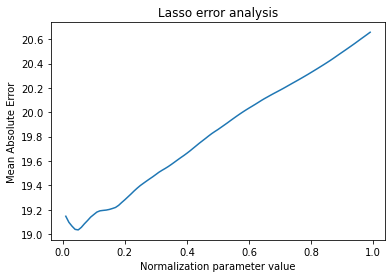

In [207]:
plt.plot(alpha, error)
plt.xlabel('Normalization parameter value')
plt.ylabel('Mean Absolute Error')
plt.title('Lasso error analysis')
    

We clearly have a value of alpha that minimizes the error. Let's find this value.


In [208]:
err = tuple(zip(alpha,error))

In [213]:
df_err = pd.DataFrame(err, columns = ['alpha', 'error'])
df_err.head()

alpha      error
0   0.01  19.146556
1   0.02  19.096855
2   0.03  19.065153
3   0.04  19.038937
4   0.05  19.034355

In [214]:
df_err[df_err['error']== df_err['error'].min()]

alpha      error
4   0.05  19.034355

The error is the lowest when alpha equals 0,05.

In [257]:
lasso = Lasso(alpha = 0.05)

In [216]:
model_scores(lasso, X_train,y_train)

The cross validation scores are:  [17.36282159 21.13246197 22.14967951 17.95537042 20.53393127 18.38782632
 17.59442377 18.95317144 18.98212465 17.29173788]
The mean cross validation score is:  19.03435488075318


Lasso gives much better results than the Multiple Regression. One average the lasso model predicts the salary with an error of nineteen thousand dollars annually. 

In [258]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.05)

In [218]:
y_hat = lasso.predict(X_train)

In [219]:
print('The training R_squared is: ', r2_score(y_train, y_hat))

The training R_squared is:  0.37727786486736314


Lasso regression tends to calculate a close to zero coefficient for non statistical significant predictors. 

In [220]:
lasso.coef_

array([ 3.40906388e+00, -0.00000000e+00,  4.98804197e+00,  0.00000000e+00,
        4.34423738e+00,  2.45426973e+00, -2.39888700e+01,  0.00000000e+00,
        8.57175133e+00,  0.00000000e+00, -8.58072743e+00, -0.00000000e+00,
        2.25340177e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.66545939e+00, -2.31101455e+00,  0.00000000e+00, -6.20032733e+00,
        1.38945793e+01, -7.23139000e+00, -3.66523144e+00,  9.56772632e+00,
       -1.05470955e-01,  7.46280933e-01,  1.79455477e+01,  4.76150863e+00,
       -1.26765341e-01, -1.61044270e-01, -1.98367253e+01, -0.00000000e+00,
        4.02060178e+00, -1.04806478e+00,  2.07801481e-01, -1.79483471e+01,
       -0.00000000e+00,  0.00000000e+00,  2.34869052e+01, -0.00000000e+00,
       -8.26365956e+00,  3.70033139e+00,  8.14396064e+00, -6.05790934e+00,
       -1.77037815e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  9.26714747e+00,
        9.41596712e+00, -

**Ridge Regression**

In [221]:
from sklearn.linear_model import Ridge

In [224]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/10)
    ridge = Ridge(alpha=(i/10))
    error.append((- cross_val_score(ridge, X_train, y_train, cv=10, 
                                    scoring = 'neg_mean_absolute_error')).mean())


Text(0.5, 1.0, 'Ridge error analysis')

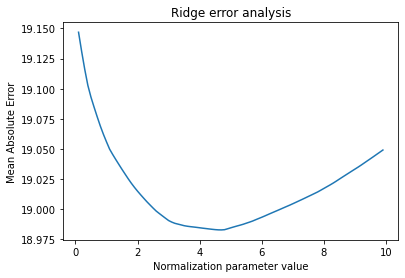

In [225]:
plt.plot(alpha, error)
plt.xlabel('Normalization parameter value')
plt.ylabel('Mean Absolute Error')
plt.title('Ridge error analysis')

Let's calculate the alpha that corresponds to the minimum MSE. 

In [226]:
err = tuple(zip(alpha,error))

In [228]:
df_rid = pd.DataFrame(err, columns = ['alpha', 'error'])
df_rid.head()

alpha      error
0    0.1  19.146817
1    0.2  19.130879
2    0.3  19.116005
3    0.4  19.102756
4    0.5  19.093005

In [230]:
df_rid[df_rid['error'] == df_rid['error'].min()]

alpha     error
46    4.7  18.98294

The error is the lowest when alpha equals 4,7 and its lower when compared to the lasso normalization. 

In [261]:
ridge = Ridge(alpha = 4.7)

In [232]:
model_scores(ridge, X_train, y_train)

The cross validation scores are:  [17.25974342 21.26118553 21.97826487 17.68918133 20.61702585 18.45012561
 17.44685873 18.92247215 19.11878794 17.08575613]
The mean cross validation score is:  18.982940155980412


In [262]:
ridge.fit(X_train, y_train)

Ridge(alpha=4.7)

In [234]:
y_hat = ridge.predict(X_test)

In [235]:
print('The training R_squared is: ', r2_score(y_test, y_hat))

The training R_squared is:  0.2103412369070089


Comparing to the Lasso, our Ridge model seems to generalize better for the testing data, however it fits the training data worse.

**Random Forest**

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [237]:
rf = RandomForestRegressor()

In [238]:
model_scores(rf, X_train, y_train)

The cross validation scores are:  [13.87507839 15.00530371 14.3791343  11.56910003 16.99148583 16.16378667
 10.39856765 11.22495601 14.05946954 12.25061823]
The mean cross validation score is:  13.59175003558851


Even with the default values for the random forest regressor we are already getting much better results compared to the previous models tested.

In [239]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [240]:
y_hat = rf.predict(X_test)

In [241]:
print('The training R_squared is: ', r2_score(y_test, y_hat))

The training R_squared is:  0.3797959808992426


Let's tune the random forest regressor

In [10]:
from sklearn.model_selection import GridSearchCV

In [243]:
parameters = {'n_estimators':range(10,300,10), 'criterion': ('mse','mae'), 
              'max_features':('auto', 'sqrt', 'log2')}

In [244]:
gs = GridSearchCV(rf, parameters, scoring = 'neg_mean_absolute_error',cv = 10)

In [245]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [247]:
gs.best_score_

-13.213945915895902

Tuning the model resulted in a slight improvement for the Random Forest. The best estimator is: 

In [248]:
gs.best_estimator_

RandomForestRegressor(max_features='log2', n_estimators=260)

In [268]:
y_hat = gs.best_estimator_.predict(X_train)

In [269]:
r2_score(y_train, y_hat)

0.8909923053785669

The training R_squared using this model is really high. Now let's see how it generalizes for the testing set.

**Test the best model**

In [249]:
y_pred = gs.best_estimator_.predict(X_test)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [251]:
mean_absolute_error(y_test, y_pred)

16.25285839250628

We got an absolute error of approximately 16 thousand dollars, which is quite nice taking into account the inherent variation of the salaries shared by Glassdoor.

In [252]:
r2_score(y_test, y_pred)

0.4106322468010989

With the tuned random forest, 41% of the inherent variability of the data is explained. 

**Trying some ensembling**

Ridge + Random Forest

In [263]:
y_pred_ridge = ridge.predict(X_test)

In [264]:
mean_absolute_error((y_pred_ridge + y_pred)/2, y_test)

18.30255322982757

Lasso + Random Forest

In [259]:
y_pred_lasso = lasso.predict(X_test)

In [260]:
mean_absolute_error((y_pred_lasso + y_pred)/2, y_test)

18.32358818425433

Ridge + Lasso + Random Forest

In [266]:
mean_absolute_error((y_pred_lasso + y_pred + y_pred_ridge)/3, y_test)

19.335061195914342

Any of the ensembles resulted in a better model than the tuned Random Forest.

**Feature Importance**

Random Forests are very handy to get a quick understanding of what features actually matter. Let's use our best model to perform some feature importance analysis.

In [15]:
rf_best = RandomForestRegressor(max_features='log2', n_estimators=260)

In [16]:
rf_best.fit(X_train, y_train)

RandomForestRegressor(max_features='log2', n_estimators=260)

In [20]:
col = []
importance = []

for predictor, score in zip(predictors, rf_best.feature_importances_):
    col.append(predictor)
    importance.append(score)
    

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Feature Importance')

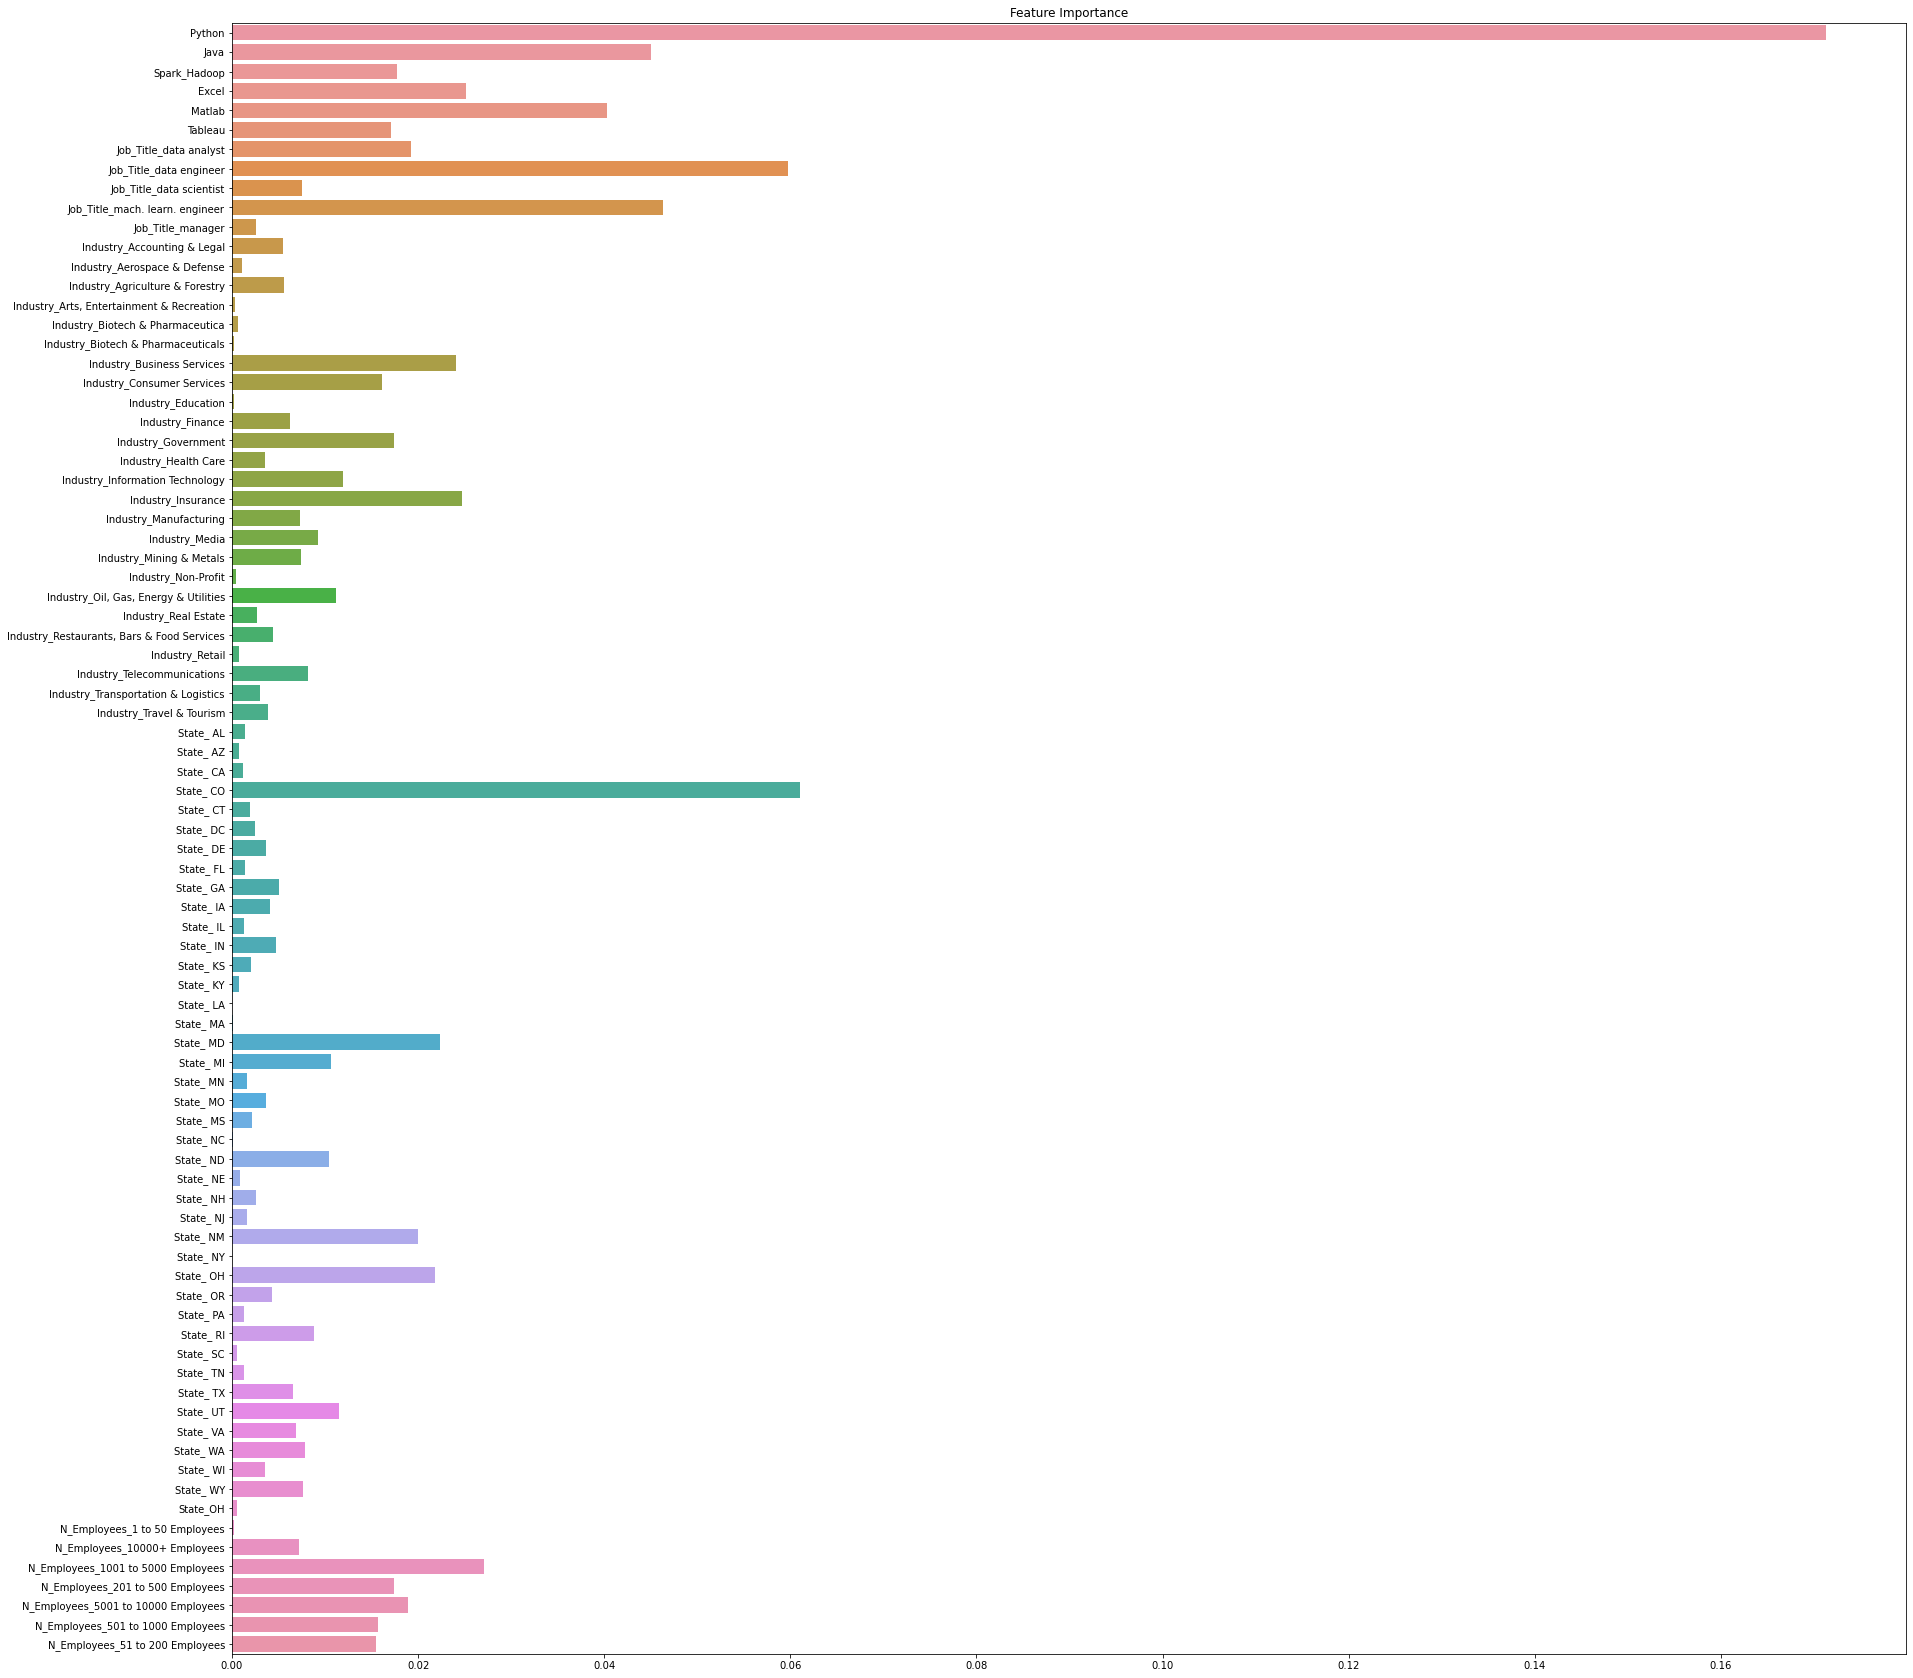

In [27]:
plt.figure(figsize=(30,30))
sns.barplot(x=importance, y=col)
plt.title('Feature Importance')

Let's create a list with the features with higher importance score.

In [30]:
best_features= []

for feature, score in zip(col,importance):
    if score > 0.001:
        best_features.append(feature)
        

In [35]:
len(best_features)

68

In [38]:
X_best_fea = df_dum[best_features]
X_best_fea.shape

(906, 68)

Now we have sixteen less predictors to deal with.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_best_fea.values, y, test_size = 0.15, random_state = 42)

Now let's train the Random Forest with limited features.

In [43]:
rf_best = RandomForestRegressor(max_features='log2', n_estimators=260)

In [44]:
rf_best.fit(X_train, y_train)

RandomForestRegressor(max_features='log2', n_estimators=260)

And let's score the predictions of the test sample.

In [46]:
y_hat = rf_best.predict(X_test)

In [48]:
mean_absolute_error(y_test, y_hat)

18.27774878323662

In [50]:
r2_score(y_test, y_hat)

0.22650444623811283

The accuracy of the random forest model with limited features is significantly worse when compared with the same model without any feature selection.

**Gradient Boosting**

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

In [18]:
gbrt = GradientBoostingRegressor(learning_rate = 0.1)

I used a low learning rate value to apply a regularization technique called shrinkage.

In [19]:
gbrt.fit(X_train, y_train)

GradientBoostingRegressor()

In [20]:
model_scores(gbrt, X_train, y_train)

The cross validation scores are:  [16.99698976 19.22921111 21.17820998 17.01273615 20.1485038  17.99007494
 16.06751267 17.00248168 20.14371423 17.19720304]
The mean cross validation score is:  18.296663736275818


Without any tuning this model performs worse than the random forest.

Tuning the model using GridSearchCV

In [22]:
parameters = {'n_estimators':range(1,10,1), 'max_depth': range(1,5)}
             

In [23]:
gs_gb = GridSearchCV(gbrt, parameters, scoring = 'neg_mean_absolute_error',cv = 10)

In [25]:
gs_gb.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': range(1, 5),
                         'n_estimators': range(1, 10)},
             scoring='neg_mean_absolute_error')

In [26]:
gs_gb.best_estimator_

GradientBoostingRegressor(max_depth=4, n_estimators=9)

Setting the max_depth parameter to 4 I'm gonna try to find the optimal number of trees using early stopping by actually stopping training early. I'm going to do this by setting warm_start = True, which makes SciKit-Learn keep existing trees when the fit() method is called, allowing incremental training.

In [42]:
gbrt = GradientBoostingRegressor(max_depth = 4, learning_rate = 0.1, warm_start = True)

The following code stops training when the validation error does not improve for five iterations in a row.

In [33]:
min_val_error = float('inf')
error_going_up = 0

for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_test)
    val_error = mean_squared_error(y_test, y_pred)
    
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break #early stopping
            

In [36]:
n_estimators

41

The optimal number of estimators is 36 (41-5).

In [45]:
gbrt = GradientBoostingRegressor(max_depth = 4, n_estimators = 41, learning_rate = 0.1, warm_start = True)

In [46]:
model_scores(gbrt, X_train, y_train)

The cross validation scores are:  [17.72510134 19.54353951 21.17584753 16.5533102  20.02462948 19.15207064
 15.95444198 18.35597918 20.59523434 16.71627706]
The mean cross validation score is:  18.57964312448267


In [47]:
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=41, warm_start=True)

In [52]:
r2_score(y_train, gbrt.predict(X_train))

0.5565739930301741

In [49]:
y_hat = gbrt.predict(X_test)

In [50]:
mean_absolute_error(y_test, y_hat)

21.507699019856478

This model is outperformed by the Random Forest.